# Projeto - Previsão de renda

## Sumário <a name='contents'></a>

1. [Etapa 1 CRISP-DM: Entendimento do negócio](#Etapa1)
2. [Etapa 2 Crisp-DM: Entendimento dos dados](#Etapa2)
3. [Etapa 3 Crisp-DM: Preparação dos dados](#Etapa3)
4. [Etapa 4 Crisp-DM: Modelagem](#Etapa4)
5. [Etapa 5 Crisp-DM: Avaliação dos resultados](#Etapa5)
6. [Etapa 6 Crisp-DM: Implantação](#Etapa6)

## Etapa 1 CRISP - DM: Entendimento do negócio <a name= 'Etapa1'></a>

<div style='text-align: right'
    
[Voltar ao sumário](#contents)

Este relatório tem como objetivo a análise e previsão de renda com base em um conjunto de dados associados aos clientes. A previsão de renda é um elemento fundamental e que tem um enorme poder no auxílio à tomada de decisões, fornecimento de atendimento ou planos personalizados de acordo com a realidade do cliente, bem como ajustes de limite de crédito com o objetivo de evitar inadimplência, entre outros aspectos. 

Para a análise de previsão de renda utilizaremos um banco de dados de uma instituição financeira hipotética. Tendo como objetivo desenvolver um modelo previsão capaz oferecer insights sobre as melhores abordagens e planos personalizados para os clientes de tal empresa, os dados serão tratados e avaliados e, posteriormente, submetidos a avaliações gráficas para melhor determinar seu comportamento. Com isso, por meio de técnicas de modelagem, a construção de um modelo específico e avaliações serão efetuadas, para que então soluções mais específicas e capazes de minimizar perdas possam ser oferecidas à empresa detentora dos dados.


## Etapa 2 Crisp-DM: Entendimento dos dados <a name='contents'></a>

<div style='text-align: right'

[Voltar ao sumário](#contents)

Os dados foram fornecidos a partir de um arquivo `.csv` e estão distribuídos em 14 variáveis, como evidenciado pela tabela abaixo. A variável de interesse, `renda`, é apresentada na última linha da tabela. 


### Dicionário de dados

Os dados estão dispostos na tabela abaixo. Cada linha é referente a uma variável e as três colunas descrevem:  a variável, a descrição de sua informação e o tipo de dado armazenado, respectivamente. Esse dicionário de dados explicita as informações que compõem o banco de dados para cada cliente.


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de registro das informações                   | string|
| id_cliente              |  Identificador exclusivo do cliente                 | int |
| sexo                    |  F = 'Feminino'; M = 'Masculino'                    | string |
| posse_de_veiculo        |  False = "Não possui"; "True = Possui"              | bool |
| posse_de_imovel         |  False = "Não possui"; "True = Possui"              | bool |
| qtd_filhos              |  Quantidade de filhos                               | int |
| tipo_renda              |  Tipo de renda (ex: Empresário, Assalariado etc.)   | string |
| educacao                |  Grau de escolaridade (ex: Primário, Secundário etc.)| string |
| estado_civil            |  Estado civil (ex: Solteiro, Casado etc.)           | string |
| tipo_residencia         |  Tipo de residência (ex: Casa, Aluguel etc.)        | string |
| idade                   |  Idade do cliente (em anos)                         | int |
| tempo_emprego           |  Tempo de emprego (em anos)                         | float |
| qt_pessoas_residencia   |  Número de pessoas na residência                    | float |
| renda                   |  Valor da renda mensal                              | float |





#### Carregando os pacotes
<span style='color:purple'> É considerado uma boa prática carregar os pacotes que serão utilizados ao longo do projeto logo no início.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

# Para uma análise inicial (automática)
from ydata_profiling import ProfileReport

# Para regressões
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Para modelos de árvore de decisão
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error

#### Carregando os dados
Como apresentado anteriormente os dados foram disponibilizados no formato `.csv`, dessa forma utilizaremos o comando `pd.read_csv`, da biblioteca Pandas, para carregar os dados em um objeto do tipo *DataFrame* (`<class 'pandas.core.frame.DataFrame'>`).

In [20]:
# Carregando dataframe (df)

df_raw = pd.read_csv('./input/previsao_de_renda.csv')
type(df_raw)

pandas.core.frame.DataFrame

In [21]:
# Visualizando as primeira 8 linhas do df
df_raw.head(5)

Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01       15056    F             False             True   
1           1  2015-01-01        9968    M              True             True   
2           2  2015-01-01        4312    F              True             True   
3           3  2015-01-01       10639    F             False             True   
4           4  2015-01-01        7064    M              True            False   

   qtd_filhos        tipo_renda           educacao estado_civil  \
0           0        Empresário         Secundário     Solteiro   
1           0       Assalariado  Superior completo       Casado   
2           0        Empresário  Superior completo       Casado   
3           1  Servidor público  Superior completo       Casado   
4           0       Assalariado         Secundário     Solteiro   

  tipo_residencia  idade  tempo_emprego  qt_pessoas_residencia    renda  
0            Casa     26       6.602740                    1.0  8060.34  
1            Casa     28       7.183562                    2.0  1852.15  
2            Casa     35       0.838356                    2.0  2253.89  
3            Casa     30       4.846575                    3.0  6600.77  
4   Governamental     33       4.293151                    1.0  6475.97

In [22]:
# Descrição dos dados categóricos 

df_raw.select_dtypes('object').describe().transpose()

count unique          top   freq
data_ref         15000     15   2015-01-01   1000
sexo             15000      2            F  10119
tipo_renda       15000      5  Assalariado   7633
educacao         15000      5   Secundário   8895
estado_civil     15000      5       Casado  10534
tipo_residencia  15000      6         Casa  13532

In [23]:
# Descrição dos dados numéricos

df_raw.select_dtypes('number').describe().T

count         mean          std         min  \
Unnamed: 0             15000.0  7499.500000  4330.271354    0.000000   
id_cliente             15000.0  8304.871400  4797.780446    1.000000   
qtd_filhos             15000.0     0.432333     0.746631    0.000000   
idade                  15000.0    43.882333    11.273155   22.000000   
tempo_emprego          12427.0     7.722635     6.711189    0.117808   
qt_pessoas_residencia  15000.0     2.206400     0.909792    1.000000   
renda                  15000.0  5697.287057  8266.816289  118.710000   

                               25%          50%           75%            max  
Unnamed: 0             3749.750000  7499.500000  11249.250000   14999.000000  
id_cliente             4181.000000  8297.000000  12403.000000   16649.000000  
qtd_filhos                0.000000     0.000000      1.000000      14.000000  
idade                    34.000000    43.000000     53.000000      68.000000  
tempo_emprego             2.973973     6.013699     10.120548      42.906849  
qt_pessoas_residencia     2.000000     2.000000      3.000000      15.000000  
renda                  2026.110000  3499.720000   6392.167500  245141.670000

> De acordo com a contagem, já podemos afirmar que há dados faltantes na variável `tempo_emprego`, bem como o fato de que há variáveis que não são relevantes como `Unnamed: 0` e `id_cliente`. Trataremos tais dados mais adiante.

#### Entendimento dos dados - Análise univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [26]:
# Avaliando o estrutura do dataframe e os dados

print('Shape -->', df_raw.shape)
df_raw.info()

Shape --> (15000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non

- Vamos começar utilizando o `ProfileReport`, para gerar um relatório automático como uma análise inicial.

In [28]:
# Gerando o relatório

prof = ProfileReport(df_raw, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- Gerando um arquivo `.html` que levará para uma página do navegador, na qual uma visualização online do relatório estará disponível.

In [30]:
# Salvando o arquivo HTML para acessar a análise

os.makedirs('./output', exist_ok=True) # Gerando uma pasta de output
prof.to_file('./output/renda_analisys.html') # Gerando o arquivo html

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##### <span style='color: purple'> Gerando visualizações gráficas das variáveis 

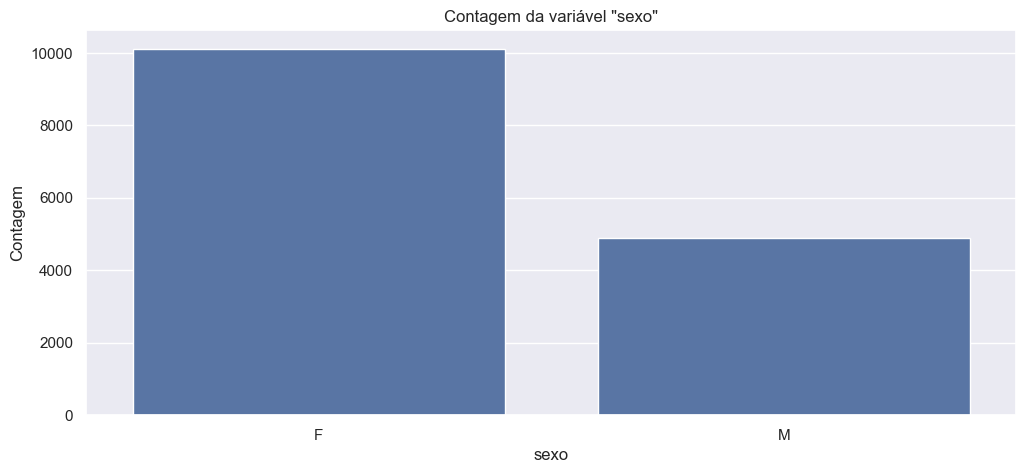

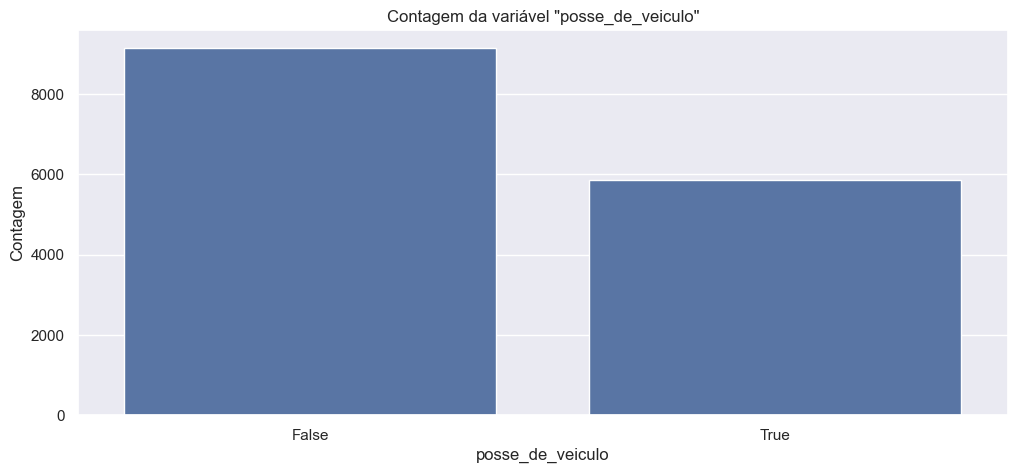

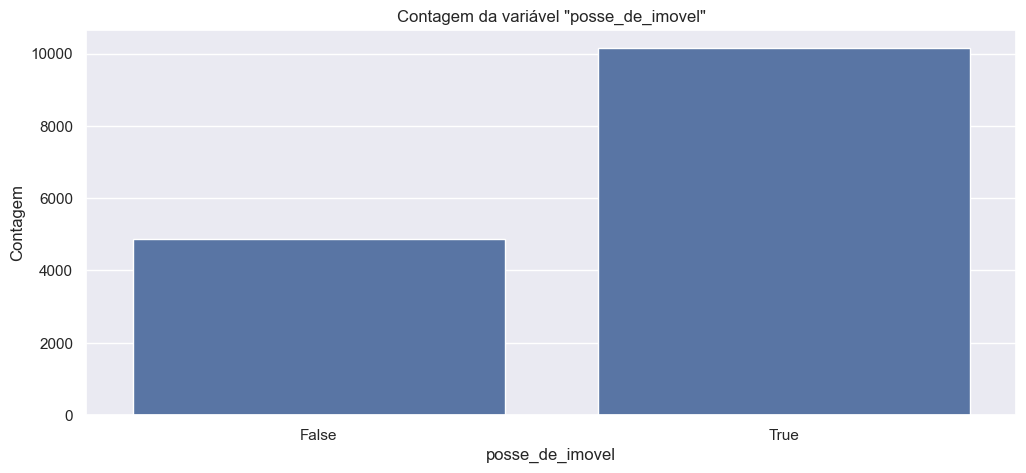

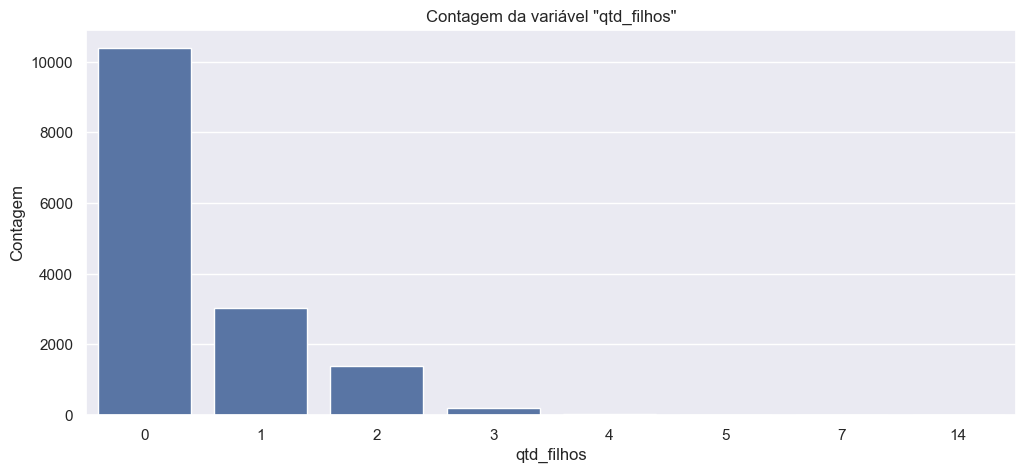

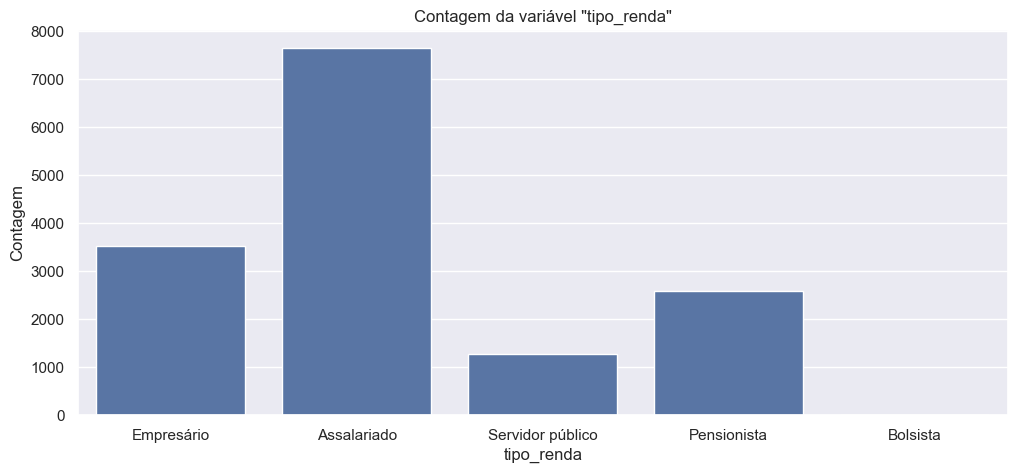

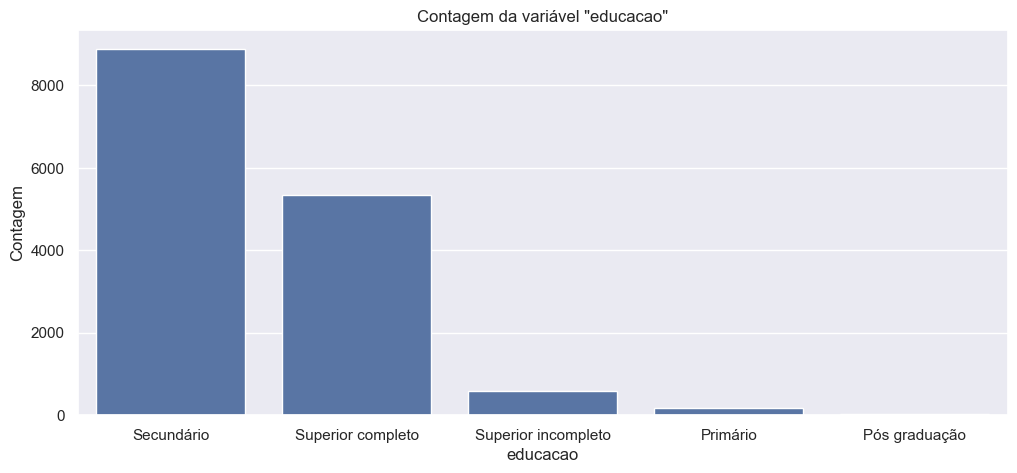

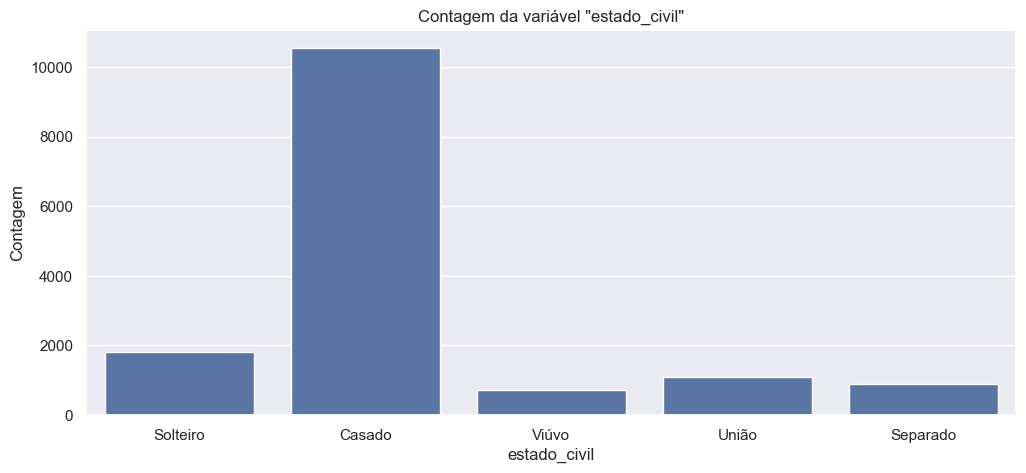

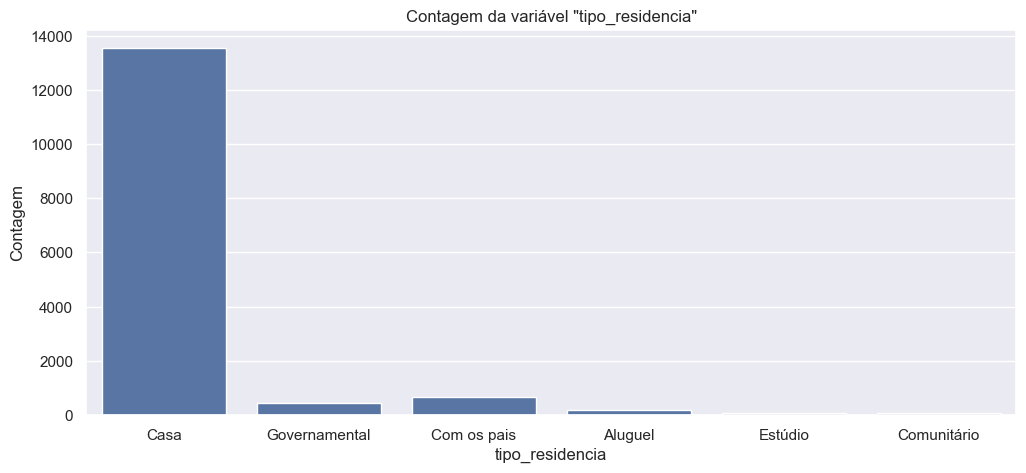

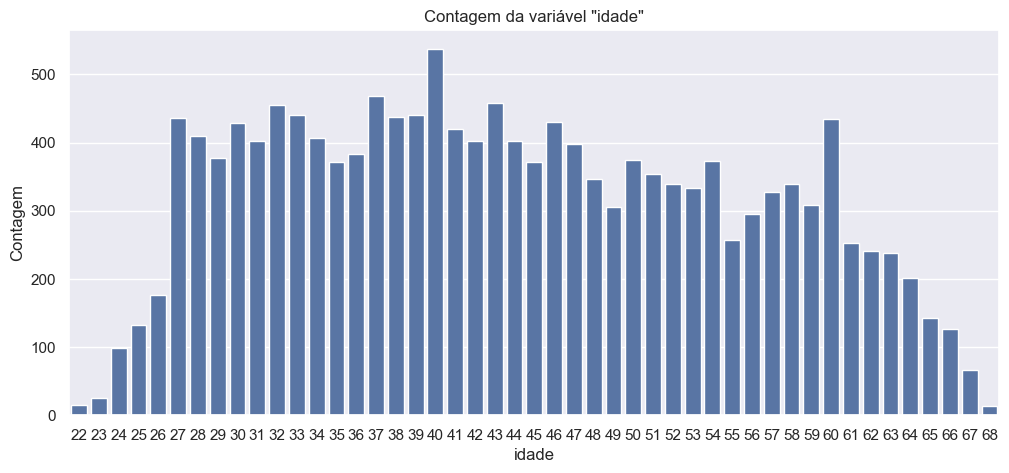

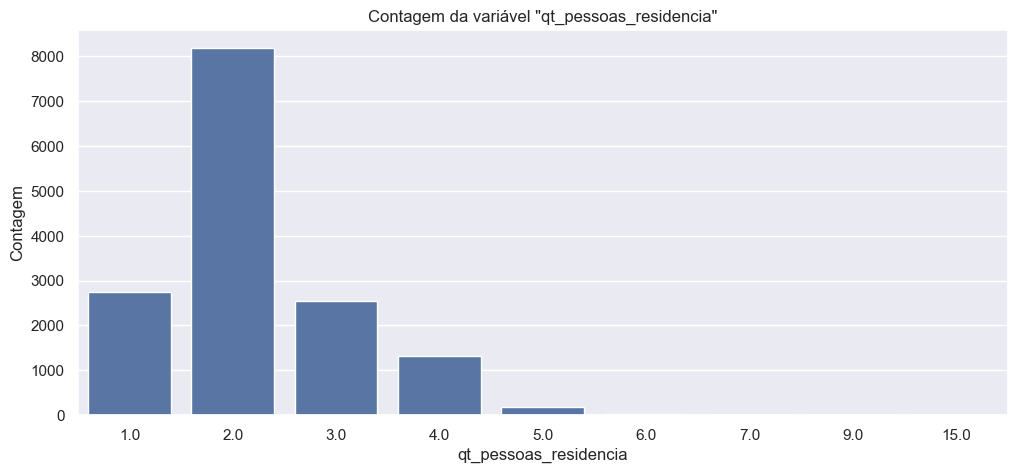

In [32]:
# Variáveis
var_interesse = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 
                 'educacao', 'estado_civil', 'tipo_residencia', 'idade', 'qt_pessoas_residencia']

# Gerando os painéis da contagem das variáveis
sns.set_theme(style='darkgrid')

for var in var_interesse:  
    plt.figure(figsize=[12, 5])
    sns.countplot(x = var, data = df_raw)
    plt.title('Contagem da variável "{}"'.format(var))
    plt.ylabel('Contagem')
    plt.xlabel(var)
    plt.show()

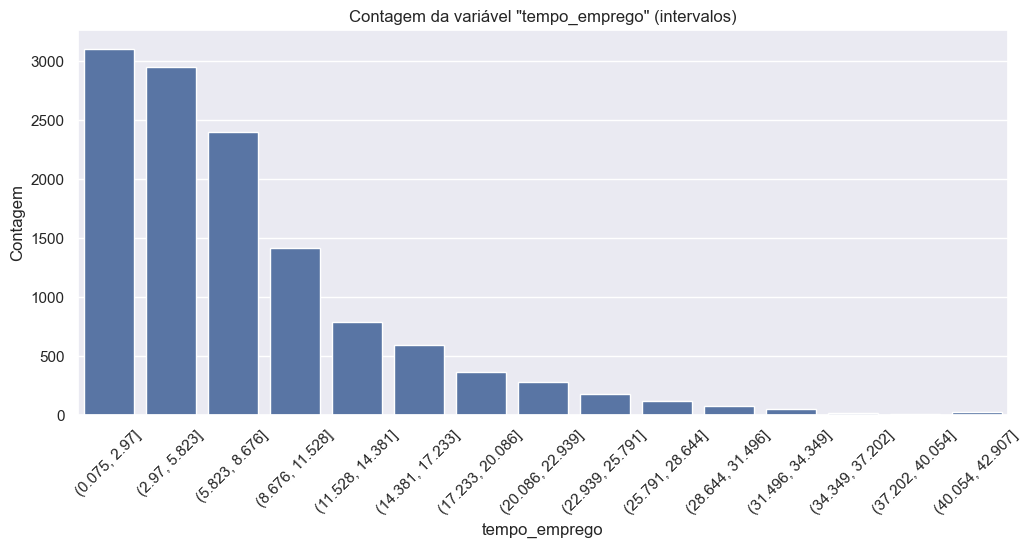

In [33]:
# Plot para a variável tempo_emprego, separado por não ser uma variável discreta

# Podemos analisar de duas formas:
# 1º
plt.figure(figsize=[12,5])
sns.histplot(x = 'tempo_emprego', data=df_raw, bins=15)
plt.title('Contagem da variável "tempo_emprego"')
plt.xlabel('tempo_emprego')
plt.ylabel('Contagem')
plt.show()

# 2º - Separando em intervalos
plt.figure(figsize=[12,5])
intervalos = pd.cut(df_raw['tempo_emprego'], bins=15)
sns.countplot(x = intervalos, data = df_raw)
plt.xticks(rotation=45)
plt.title('Contagem da variável "tempo_emprego" (intervalos)')
plt.xlabel('tempo_emprego')
plt.ylabel('Contagem')
plt.show()

###  Insights

Uma análise geral nos permite extrair as seguinte informações gerais:
- Há uma prediminância do sexo feminino no banco de dados analisado;
- Os indivíduos, majoritariamente, optam por possuir imóvel e não veículo;
- É possível notar também que, apesar de a idade média ser de 43 anos e a maioria dos indivíduos serem casados (10534 indivíoduos casados), as pessoas parecem optar por não terem filhos. Isso também se reflete na quantidade de pessoas na residência, uma vez que muitos casais não possuem filhos, esse número é, majoritariamente, igual a 2 (o casal). 

In [35]:
# Valores comentados

print('----> Quantidade de indivíduos por sexo: ', df_raw.sexo.value_counts())
print('----> A idade média é {:.2f} anos e a mediana é {} anos.'.format(df_raw.idade.mean(), df_raw.idade.median()))
print('----> Estado civil:', df_raw.estado_civil.value_counts())

----> Quantidade de indivíduos por sexo:  sexo
F    10119
M     4881
Name: count, dtype: int64
----> A idade média é 43.88 anos e a mediana é 43.0 anos.
----> Estado civil: estado_civil
Casado      10534
Solteiro     1798
União        1078
Separado      879
Viúvo         711
Name: count, dtype: int64


### Entendimento dos dados - Bivariadas




A partir deste momento faremos uma análise associando mais de uma variável.


##### Visualização gráfica da contagem da variável `tipo_renda` em função da `data_ref`.

In [39]:
# Convertendo a variável "data_ref" para datetime

df_raw['data_ref'] = pd.to_datetime(df_raw.data_ref)
print('Tipo -->', df_raw.data_ref.dtypes)

Tipo --> datetime64[ns]


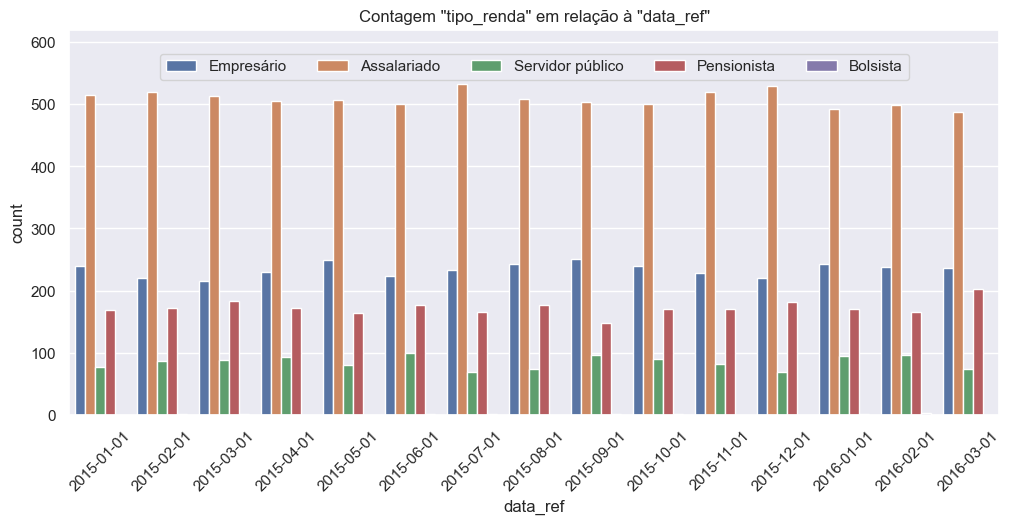

In [40]:
# Gerando figura
plt.figure(figsize=[12,5])
sns.countplot(data=df_raw,
             x = 'data_ref',
             hue = 'tipo_renda')
plt.title('Contagem "tipo_renda" em relação à "data_ref"')
plt.xticks(rotation=45)
plt.ylim(0, 620)
plt.legend(loc='lower center', bbox_to_anchor=[0.5, 0.85], ncols=5)
plt.show()

##### Visualização gráfica da contagem da variável `educacao` em função da `data_ref`.

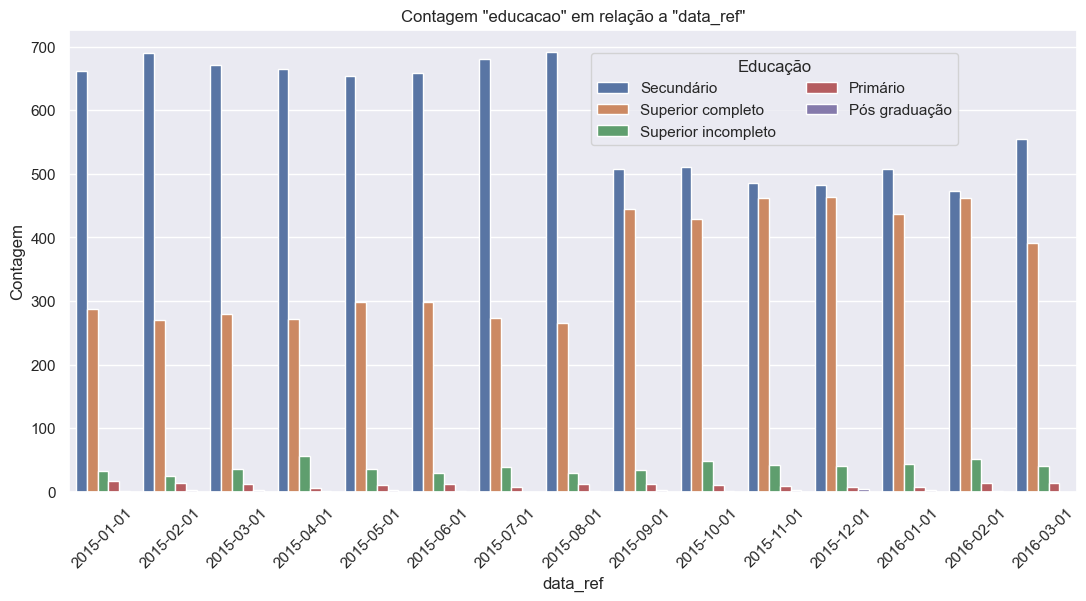

In [42]:
plt.figure(figsize=[13,6])
sns.countplot(data = df_raw,
             x = 'data_ref',
             hue = 'educacao')
plt.title('Contagem "educacao" em relação a "data_ref"')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(loc='center', bbox_to_anchor=[.7,.85], ncols=2, title='Educação')

plt.show()

##### Gerando visualizações do tipo `pointplot` da `renda` em função da `data_ref` para as variáveis `'sexo', 'posse_de_imovel', 'posse_de_veiculo'`.

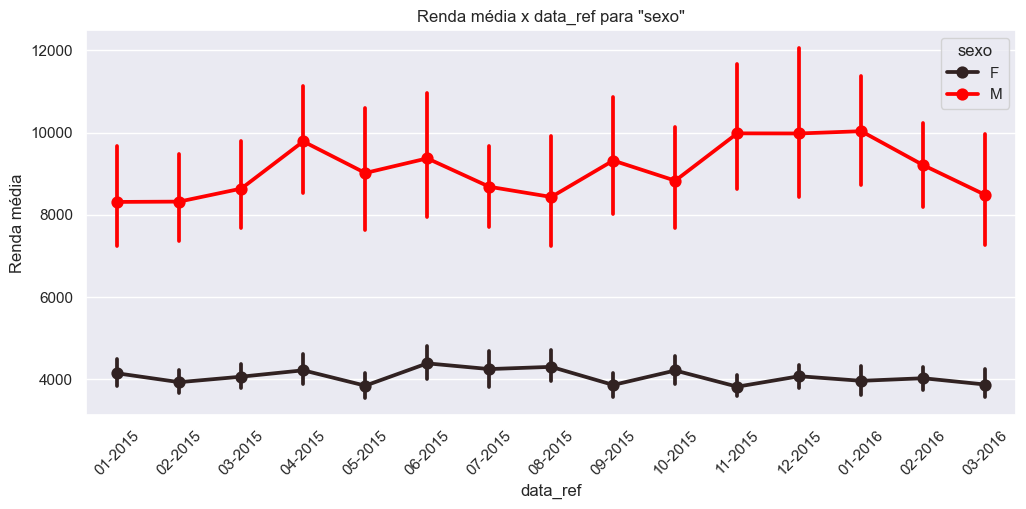

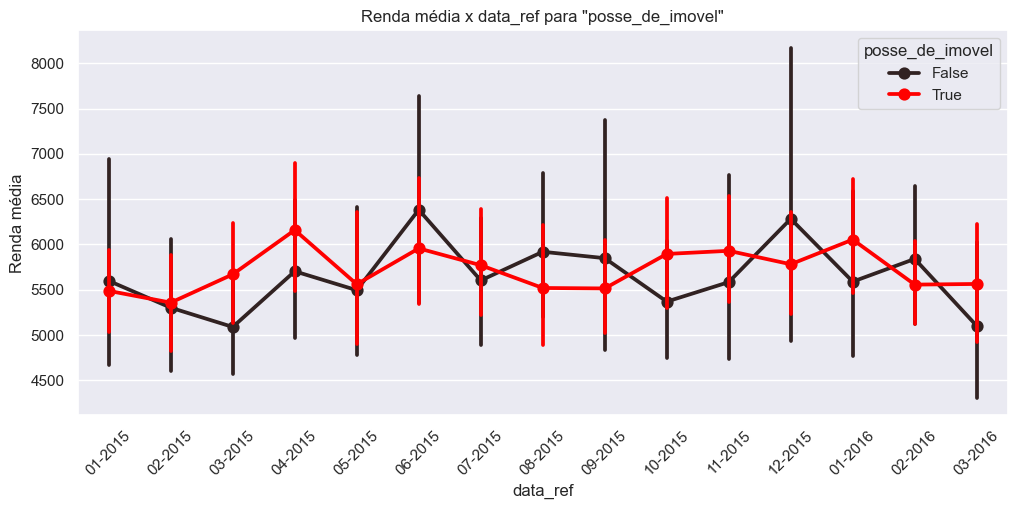

In [44]:
# Lista das variáveis de interesse
variaveis = ['sexo', 'posse_de_imovel', 'posse_de_veiculo']

# Visualização gráfica 
for var in variaveis: 
    plt.figure(figsize=[12,5])
    ax = sns.pointplot(
          data = df_raw,
          x = 'data_ref',
          y = 'renda',
          estimator='mean',
          hue = var,
          palette = 'dark:red'
    )
    # Modificando a configuração das datas
    tick_labs = df_raw['data_ref'].map(lambda x: x.strftime('%m-%Y')).unique()
    ticks = ax.set_xticks(list(range(df_raw['data_ref'].nunique())))
    labels = ax.set_xticklabels(tick_labs, rotation=45)
    plt.title('Renda média x data_ref para "{}"'.format(var))
    plt.xlabel('data_ref')
    plt.ylabel('Renda média')
    plt.xticks(rotation=45)
    plt.show()

##### **Renda** em função da **posse de veículo** e da **posse de imóvel**.

In [46]:
sns.set_theme(style='darkgrid')
fig, axes = plt.subplots(2, 2, figsize=[12,10])
ax1 = sns.histplot(ax = axes[0,0],
            data=df_raw,
            x = 'renda',
            hue = 'posse_de_veiculo',
            bins=80,)
ax1.set_title('Contagem da renda em relação a posse de veículo')
ax1.set_ylabel('Contagem')

# Zoom
ax2 = sns.histplot(ax = axes[0,1],
                  data = df_raw,
                  x = 'renda',
                  hue = 'posse_de_veiculo',
                  bins = 80)
ax2.set(ylim=(0,20))
ax2.set_title('Contagem da renda em relação a posse de veículo (Zoom)')
ax2.set_ylabel('Contagem')

# Posse de imóvel
ax3 = sns.histplot(ax = axes[1,0],
                  data = df_raw, 
                  x = 'renda',
                  hue = 'posse_de_imovel',
                  bins=80)
ax3.set_title('Contagem da renda em relação a posse de imóvel')
ax3.set_ylabel('Contagem')

# Zoom
ax4 = sns.histplot(ax = axes[1,1],
                  data = df_raw,
                  x = 'renda', 
                  hue = 'posse_de_imovel',
                  bins = 80)
ax4.set_title('Contagem da renda em relação a posse de imóvel (Zoom)')
ax4.set_ylabel('Contagem')
ax4.set(ylim=(0, 20))

# Ajuste do espaçamento horizontal e vertical entre os painéis
plt.subplots_adjust(wspace = 0.2, hspace = .3)

##### Histograma do **tempo de emprego** em função da **posse de veículo** e **posse de imóvel**.

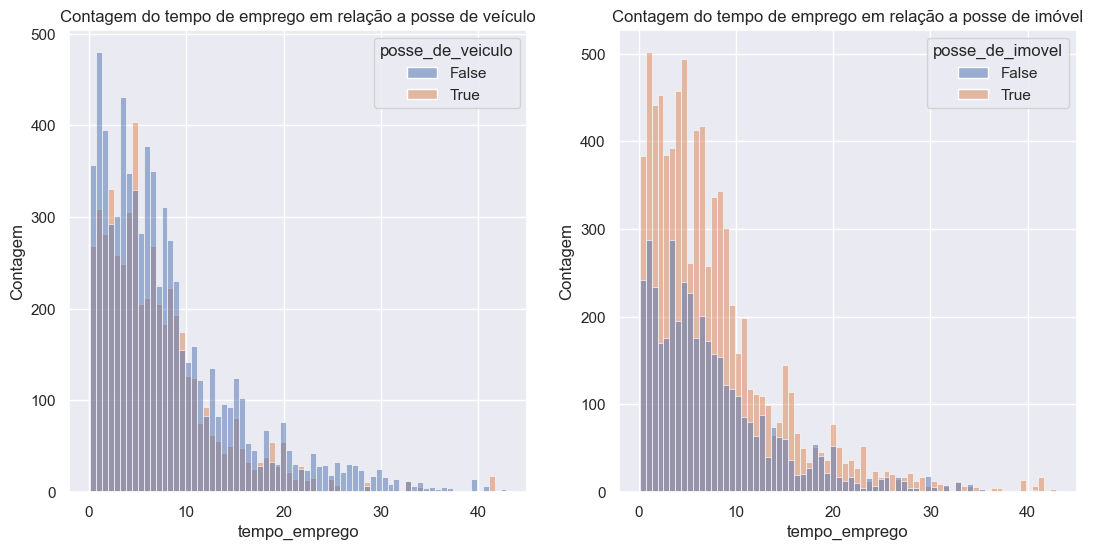

In [48]:
fig, axes = plt.subplots(1, 2, figsize=[13,6])

# Painel da esquerda
ax1 = sns.histplot(ax = axes[0],
            data=df_raw,             
            x = "tempo_emprego",
            hue='posse_de_veiculo')
ax1.set_title('Contagem do tempo de emprego em relação a posse de veículo')
ax1.set_ylabel('Contagem')

# Painel da direita
ax2 = sns.histplot(
    ax = axes[1],
    data = df_raw,
    x = 'tempo_emprego',
    hue = 'posse_de_imovel')
ax2.set_title('Contagem do tempo de emprego em relação a posse de imóvel')
ax2.set_ylabel('Contagem')

plt.show()

##### Gráfico de dispersão - `renda` x `tempo_emprego`.

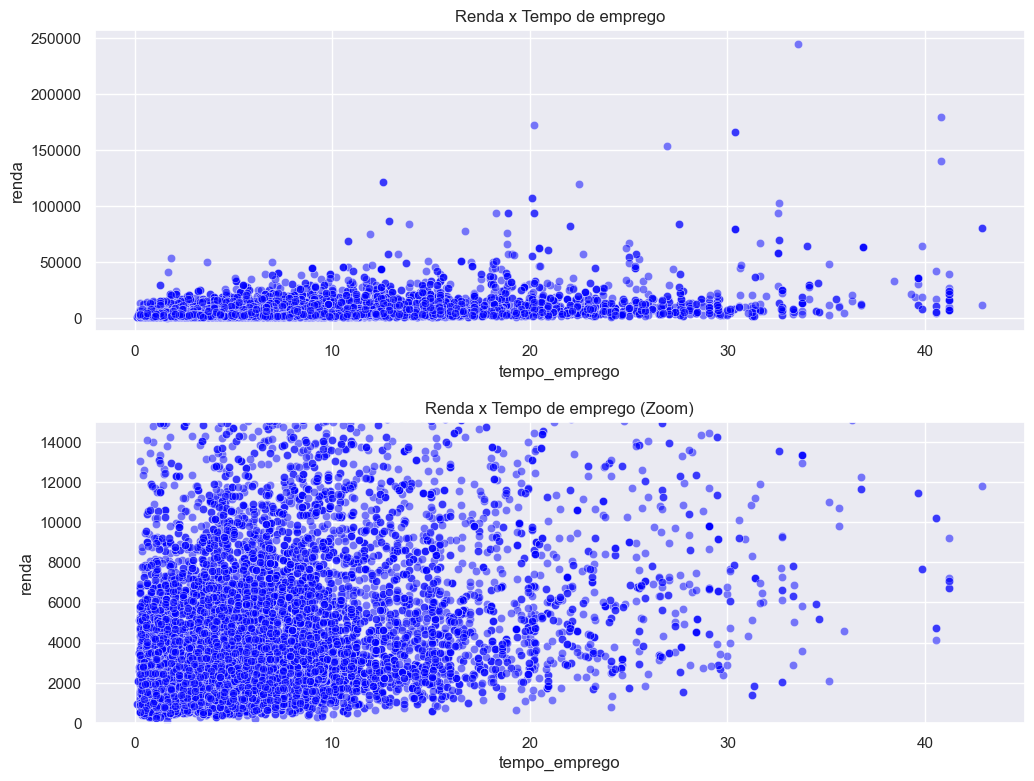

In [50]:
# Avaliando a renda em função do tempo de emprego

fig, axes = plt.subplots(2,1, figsize=[12,9])
ax1 = sns.scatterplot(ax = axes[0],
                data=df_raw, 
                x='tempo_emprego', 
                y='renda',
                # hue = 'sexo',
               color='blue',
               alpha=.5)
ax1.set_title('Renda x Tempo de emprego')

# Zoom em um determinado intervalo
ax2 = sns.scatterplot(ax = axes[1],
                data=df_raw, 
                x='tempo_emprego', 
                y='renda',
                # hue = 'sexo',
               color='blue',
               alpha=.5)
ax2.set_title('Renda x Tempo de emprego (Zoom)')
ax2.set(ylim=(0, 15000))

# Ajuste do espaço entre os painéis
plt.subplots_adjust(hspace=.3)

plt.show()

##### Analisando a `renda` em função da escolaridade (`educacao`).

In [52]:
# Utilizando o pivot_table (mean)
table = pd.pivot_table(data=df_raw, values='renda', index='educacao', aggfunc='mean')
table

renda
educacao                        
Primário             4633.434000
Pós graduação        3958.115000
Secundário           5538.504497
Superior completo    6098.944238
Superior incompleto  4816.948601

<Axes: xlabel='educacao'>

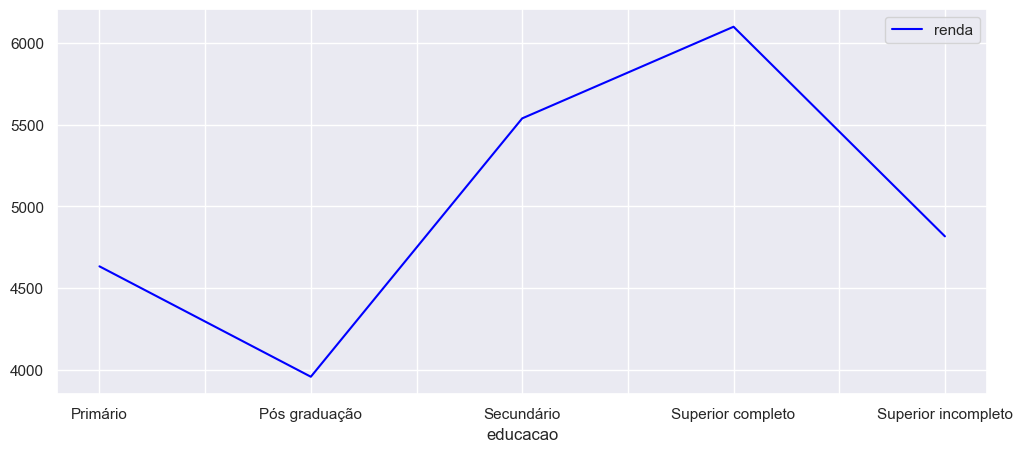

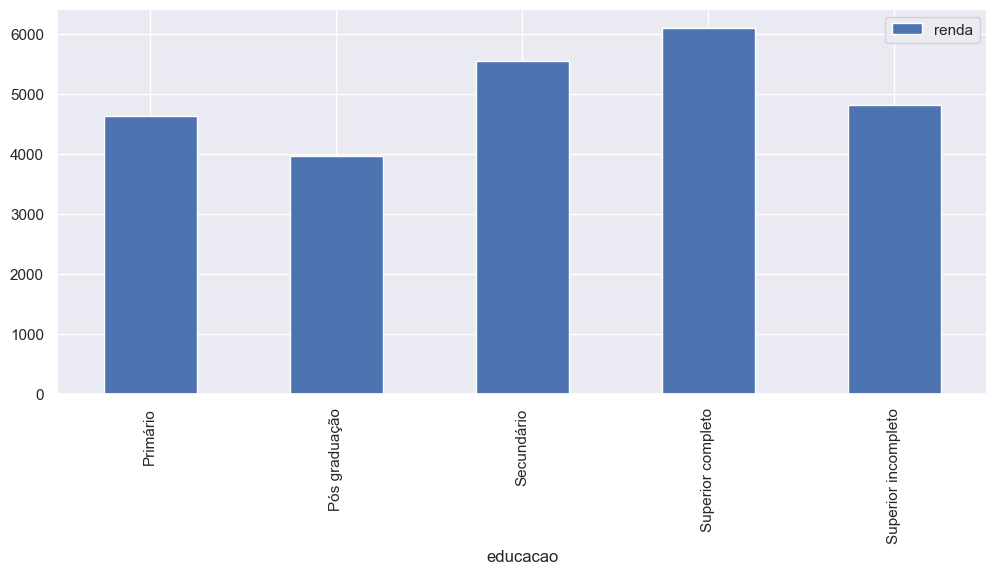

In [53]:
# Visualização gráfica
table.plot(figsize=[12,5], color='blue')
table.plot.bar(figsize=[12,5])

##### Analisando a correlação entre as variáveis numéricas 

In [55]:
number = df_raw.select_dtypes('number')
number.drop(['Unnamed: 0', 'id_cliente'], axis=1, inplace=True)
number.corr()

qtd_filhos     idade  tempo_emprego  \
qtd_filhos               1.000000 -0.360426      -0.063220   
idade                   -0.360426  1.000000       0.321573   
tempo_emprego           -0.063220  0.321573       1.000000   
qt_pessoas_residencia    0.889777 -0.339320      -0.065670   
renda                    0.029346  0.022435       0.385013   

                       qt_pessoas_residencia     renda  
qtd_filhos                          0.889777  0.029346  
idade                              -0.339320  0.022435  
tempo_emprego                      -0.065670  0.385013  
qt_pessoas_residencia               1.000000  0.047842  
renda                               0.047842  1.000000

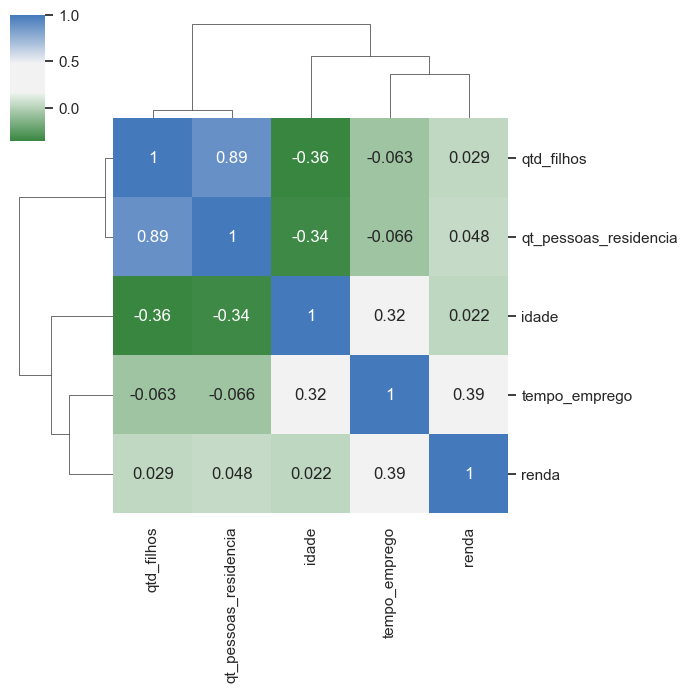

In [56]:
# Gerando o clustermap
cmap = sns.diverging_palette(h_neg=850, h_pos=250, as_cmap=True, sep=60, center='light')
sns.clustermap(number.corr(),
               annot = True,
               figsize = [7, 7],
               cmap = cmap)

### Insights
Há características interessantes que se destacam nesta análise. Vamos comentar algumas delas.
- A variável educação ao longo do tempo nos traz uma informação interessante, como podemos ver a partir de “2015-09-01” a quantidade de pessoas com “Secundário” diminui significativamente e as pessoas com “Superior completo” aumenta em uma proporção semelhante. Devido a isso, é possível intuir que os indivíduos estavam com o ensino superior em andamento nesse período (tendo apenas o “Secundário” completo);
- No que tange a renda média em relação ao sexo, ponto esse que deve ser tratado com cuidado. É possível notar, para esse conjunto de dados, que o sexo masculino possui uma média salarial cerca de duas vezes maior que o sexo feminino;
- A renda média em relação à posse de imóvel deixa claro o que parece ser um consenso, as pessoas têm preferência por possuir um imóvel independente da média salarial, não há grandes discrepâncias salariais médias entre quem possui e não possui imóvel. Já no que tange a posse de veículo, essa sim é uma opção predominante entre os indivíduos com maior média salarial;
- Na dispersão da renda ao longo do tempo de emprego podemos notar que há uma concentração majoritária em valores de renda abaixo de 10.000,00 reais, sendo que a média da renda está em torno de 5.700,00 reais. Vale lembrar aqui que os valores discrepantes, muito altos, tendem a puxar essa média para cima, como é o caso isolado do indivíduo que recebe cerca de R$245.000,00.

## Etapa 3 Crisp-DM: Preparação dos dados <a name='Etapa3'> </a>

<div style='text-align:right'

[Voltar ao sumário](#contents)

Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [60]:
# Verificando dados duplicados

df_raw.duplicated().value_counts()

False    15000
Name: count, dtype: int64

Vamos, em primeiro momento, remover as colunas `Unnamed: 0` e `id_cliente` que não são relevantes para a análise.

In [62]:
# Removendo colunas e gerando um novo DataFrame (df)
df = df_raw.drop(['Unnamed: 0', 'id_cliente'], axis=1)
print(df.shape)
df.head(3)

(15000, 13)


data_ref sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos   tipo_renda  \
0 2015-01-01    F             False             True           0   Empresário   
1 2015-01-01    M              True             True           0  Assalariado   
2 2015-01-01    F              True             True           0   Empresário   

            educacao estado_civil tipo_residencia  idade  tempo_emprego  \
0         Secundário     Solteiro            Casa     26       6.602740   
1  Superior completo       Casado            Casa     28       7.183562   
2  Superior completo       Casado            Casa     35       0.838356   

   qt_pessoas_residencia    renda  
0                    1.0  8060.34  
1                    2.0  1852.15  
2                    2.0  2253.89

In [63]:
# Verificando algumas variáveis

print('Educação -->', df.educacao.unique(), '\n')
print('Sexo -->', df.sexo.unique(), '\n')
print('Posse de imóvel -->', df.posse_de_imovel.unique(), '\n')
print('Posse de veículo -->', df.posse_de_veiculo.unique(), '\n')
print('Tipo de renda -->', df.tipo_renda.unique(), '\n')
print('Estado civil -->', df.estado_civil.unique(), '\n')
print('Tipo de residência -->', df.tipo_residencia.unique(), '\n')

Educação --> ['Secundário' 'Superior completo' 'Superior incompleto' 'Primário'
 'Pós graduação'] 

Sexo --> ['F' 'M'] 

Posse de imóvel --> [ True False] 

Posse de veículo --> [False  True] 

Tipo de renda --> ['Empresário' 'Assalariado' 'Servidor público' 'Pensionista' 'Bolsista'] 

Estado civil --> ['Solteiro' 'Casado' 'Viúvo' 'União' 'Separado'] 

Tipo de residência --> ['Casa' 'Governamental' 'Com os pais' 'Aluguel' 'Estúdio' 'Comunitário'] 



Uma vez que as variáveis `posse_de_veiculo` e `posse_de_imovel` são booleanas (`True` e `False`), vamos modificá-las para `int` (`True` --> $1$ e `False` --> $0$), pois convertê-las diretamente para dummies geraria novas colunas, cuja criação não é necessária. Façamos o mesmo para a coluna sexo, mapeando-a para `F` --> $1$ e `M` --> $0$.

In [65]:
# Com a geração direta de dummies teríamos

pd.concat([pd.get_dummies(df.posse_de_veiculo), 
           pd.get_dummies(df.posse_de_imovel), pd.get_dummies(df.sexo)], axis=1).head()

False   True  False   True      F      M
0   True  False  False   True   True  False
1  False   True  False   True  False   True
2  False   True  False   True   True  False
3   True  False  False   True   True  False
4  False   True   True  False  False   True

In [66]:
# Convertendo para "int"
# 0 --> False
# 1 --> True

df['posse_de_veiculo'] = df.posse_de_veiculo.astype(int)
df.posse_de_imovel = df['posse_de_imovel'].astype(int)
df.sexo = df.sexo.map({'F': 1, 'M': 0})

In [67]:
df.head()

data_ref  sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  \
0 2015-01-01     1                 0                1           0   
1 2015-01-01     0                 1                1           0   
2 2015-01-01     1                 1                1           0   
3 2015-01-01     1                 0                1           1   
4 2015-01-01     0                 1                0           0   

         tipo_renda           educacao estado_civil tipo_residencia  idade  \
0        Empresário         Secundário     Solteiro            Casa     26   
1       Assalariado  Superior completo       Casado            Casa     28   
2        Empresário  Superior completo       Casado            Casa     35   
3  Servidor público  Superior completo       Casado            Casa     30   
4       Assalariado         Secundário     Solteiro   Governamental     33   

   tempo_emprego  qt_pessoas_residencia    renda  
0       6.602740                    1.0  8060.34  
1       7.183562                    2.0  1852.15  
2       0.838356                    2.0  2253.89  
3       4.846575                    3.0  6600.77  
4       4.293151                    1.0  6475.97

##### Avaliando dados ausentes

Para o conjunto de dados em questão, há dados faltantes apenas na coluna `tempo_emprego`. Devido a natureza dessa variável, a remoção de tais dados é uma boa opção. 

In [69]:
df.isnull().sum()

data_ref                    0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [70]:
# Há dados ausentes apenas em tempo_emprego
# A porcentagem de tais dados é:

temp_emp_aus = (df.tempo_emprego.isna().sum() / df.shape[0]) * 100
print('Temos um total de {}% de dados ausentes.'.format(round(temp_emp_aus, 2)))

Temos um total de 17.15% de dados ausentes.


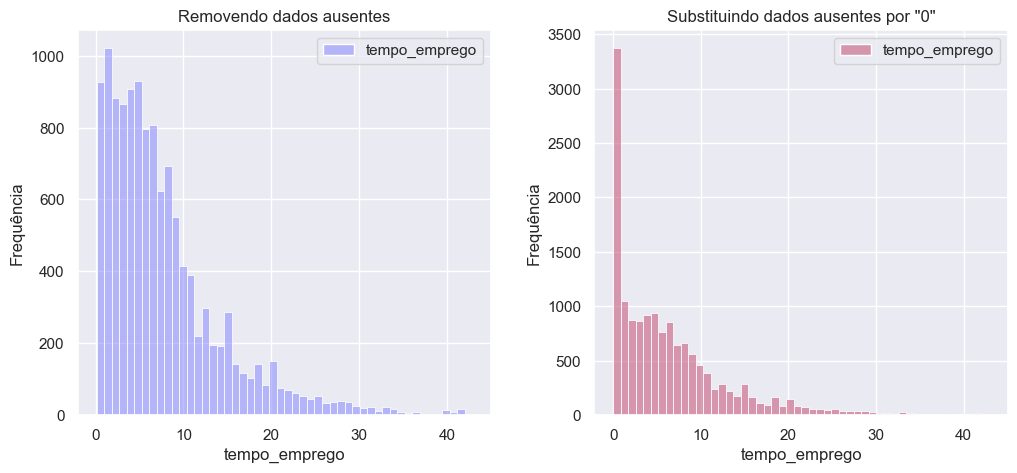

In [71]:
# Comportamento dos dados removendo os ausentes; substituindo os ausentes por 0

# df[['tempo_emprego']].dropna().plot.hist(), df[['tempo_emprego']].fillna(0).plot.hist()

# Estruturando a figura
plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
sns.histplot(df[['tempo_emprego']].dropna(), bins=50, palette='cool')
plt.title('Removendo dados ausentes')
plt.ylabel('Frequência')
plt.xlabel('tempo_emprego')

plt.subplot(1,2,2)
sns.histplot(df[['tempo_emprego']].fillna(0), bins=50, palette='flare')
plt.title('Substituindo dados ausentes por "0"')
plt.ylabel('Frequência')
plt.xlabel('tempo_emprego')

plt.subplots_adjust(wspace=.25)

Como mostram os gráficos acima, a substituição por valores aleatórios (`0`) não parece fazer sentido e distorce a distribuição dos dados, uma vez que atribui a todos os valores ausentes um valor específico, concentrando-o em uma determinada região do gráfico. Dessa forma, iremos remover os dados ausentes.

In [73]:
# Removendo dados ausentes
df.dropna(inplace=True)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12427 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data_ref               12427 non-null  datetime64[ns]
 1   sexo                   12427 non-null  int64         
 2   posse_de_veiculo       12427 non-null  int32         
 3   posse_de_imovel        12427 non-null  int32         
 4   qtd_filhos             12427 non-null  int64         
 5   tipo_renda             12427 non-null  object        
 6   educacao               12427 non-null  object        
 7   estado_civil           12427 non-null  object        
 8   tipo_residencia        12427 non-null  object        
 9   idade                  12427 non-null  int64         
 10  tempo_emprego          12427 non-null  float64       
 11  qt_pessoas_residencia  12427 non-null  float64       
 12  renda                  12427 non-null  float64       
dtypes: dat

##### Gerando variáveis dummy

A criação de variáveis dummy é de fundamental importância, uma vez que os modelos de *regressão* e *árvore de decisão*, que utilizaremos mais adiantes não lidam bem com variáveis qualitativas.

In [76]:
df = pd.get_dummies(df, drop_first=False)
print(df.shape)
df.head()

(12427, 30)


data_ref  sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  idade  \
0 2015-01-01     1                 0                1           0     26   
1 2015-01-01     0                 1                1           0     28   
2 2015-01-01     1                 1                1           0     35   
3 2015-01-01     1                 0                1           1     30   
4 2015-01-01     0                 1                0           0     33   

   tempo_emprego  qt_pessoas_residencia    renda  tipo_renda_Assalariado  ...  \
0       6.602740                    1.0  8060.34                   False  ...   
1       7.183562                    2.0  1852.15                    True  ...   
2       0.838356                    2.0  2253.89                   False  ...   
3       4.846575                    3.0  6600.77                   False  ...   
4       4.293151                    1.0  6475.97                    True  ...   

   estado_civil_Separado  estado_civil_Solteiro  estado_civil_União  \
0                  False                   True               False   
1                  False                  False               False   
2                  False                  False               False   
3                  False                  False               False   
4                  False                   True               False   

   estado_civil_Viúvo  tipo_residencia_Aluguel  tipo_residencia_Casa  \
0               False                    False                  True   
1               False                    False                  True   
2               False                    False                  True   
3               False                    False                  True   
4               False                    False                 False   

   tipo_residencia_Com os pais  tipo_residencia_Comunitário  \
0                        False                        False   
1                        False                        False   
2                        False                        False   
3                        False                        False   
4                        False                        False   

   tipo_residencia_Estúdio  tipo_residencia_Governamental  
0                    False                          False  
1                    False                          False  
2                    False                          False  
3                    False                          False  
4                    False                           True  

[5 rows x 30 columns]

Vamos renomear as colunas para que não haja espaços desnecessários nos nomes das variáveis.

In [78]:
colunas_nomes = list(df.columns)

colunas_nomes_novos = []
for elemento in colunas_nomes:
    elemento_correto = elemento.replace(' ', '_')
    colunas_nomes_novos.append(elemento_correto)

print(colunas_nomes, '\n\n')
print(colunas_nomes_novos, end='')

['data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda', 'tipo_renda_Assalariado', 'tipo_renda_Bolsista', 'tipo_renda_Empresário', 'tipo_renda_Pensionista', 'tipo_renda_Servidor público', 'educacao_Primário', 'educacao_Pós graduação', 'educacao_Secundário', 'educacao_Superior completo', 'educacao_Superior incompleto', 'estado_civil_Casado', 'estado_civil_Separado', 'estado_civil_Solteiro', 'estado_civil_União', 'estado_civil_Viúvo', 'tipo_residencia_Aluguel', 'tipo_residencia_Casa', 'tipo_residencia_Com os pais', 'tipo_residencia_Comunitário', 'tipo_residencia_Estúdio', 'tipo_residencia_Governamental'] 


['data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda', 'tipo_renda_Assalariado', 'tipo_renda_Bolsista', 'tipo_renda_Empresário', 'tipo_renda_Pensionista', 'tipo_renda_Servidor_público', 'educacao_Primário', 'educacao_Pós_graduação'

In [79]:
# Redefinindo as colunas

df.columns = colunas_nomes_novos
df.head()

data_ref  sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  idade  \
0 2015-01-01     1                 0                1           0     26   
1 2015-01-01     0                 1                1           0     28   
2 2015-01-01     1                 1                1           0     35   
3 2015-01-01     1                 0                1           1     30   
4 2015-01-01     0                 1                0           0     33   

   tempo_emprego  qt_pessoas_residencia    renda  tipo_renda_Assalariado  ...  \
0       6.602740                    1.0  8060.34                   False  ...   
1       7.183562                    2.0  1852.15                    True  ...   
2       0.838356                    2.0  2253.89                   False  ...   
3       4.846575                    3.0  6600.77                   False  ...   
4       4.293151                    1.0  6475.97                    True  ...   

   estado_civil_Separado  estado_civil_Solteiro  estado_civil_União  \
0                  False                   True               False   
1                  False                  False               False   
2                  False                  False               False   
3                  False                  False               False   
4                  False                   True               False   

   estado_civil_Viúvo  tipo_residencia_Aluguel  tipo_residencia_Casa  \
0               False                    False                  True   
1               False                    False                  True   
2               False                    False                  True   
3               False                    False                  True   
4               False                    False                 False   

   tipo_residencia_Com_os_pais  tipo_residencia_Comunitário  \
0                        False                        False   
1                        False                        False   
2                        False                        False   
3                        False                        False   
4                        False                        False   

   tipo_residencia_Estúdio  tipo_residencia_Governamental  
0                    False                          False  
1                    False                          False  
2                    False                          False  
3                    False                          False  
4                    False                           True  

[5 rows x 30 columns]

In [80]:
# Modificando colunas "bool" para "int"
# A exibição será dada no formato de 0s e 1s

colunas_bool = list(df.select_dtypes('bool').columns)

for col in colunas_bool:
    df[col] = df[col].astype(int)

In [81]:
# Verificando os dados e o dataframe

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 12427 entries, 0 to 14999
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   data_ref                       12427 non-null  datetime64[ns]
 1   sexo                           12427 non-null  int64         
 2   posse_de_veiculo               12427 non-null  int32         
 3   posse_de_imovel                12427 non-null  int32         
 4   qtd_filhos                     12427 non-null  int64         
 5   idade                          12427 non-null  int64         
 6   tempo_emprego                  12427 non-null  float64       
 7   qt_pessoas_residencia          12427 non-null  float64       
 8   renda                          12427 non-null  float64       
 9   tipo_renda_Assalariado         12427 non-null  int32         
 10  tipo_renda_Bolsista            12427 non-null  int32         
 11  tipo_renda_Empresári

data_ref  sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  idade  \
0 2015-01-01     1                 0                1           0     26   
1 2015-01-01     0                 1                1           0     28   
2 2015-01-01     1                 1                1           0     35   
3 2015-01-01     1                 0                1           1     30   
4 2015-01-01     0                 1                0           0     33   

   tempo_emprego  qt_pessoas_residencia    renda  tipo_renda_Assalariado  ...  \
0       6.602740                    1.0  8060.34                       0  ...   
1       7.183562                    2.0  1852.15                       1  ...   
2       0.838356                    2.0  2253.89                       0  ...   
3       4.846575                    3.0  6600.77                       0  ...   
4       4.293151                    1.0  6475.97                       1  ...   

   estado_civil_Separado  estado_civil_Solteiro  estado_civil_União  \
0                      0                      1                   0   
1                      0                      0                   0   
2                      0                      0                   0   
3                      0                      0                   0   
4                      0                      1                   0   

   estado_civil_Viúvo  tipo_residencia_Aluguel  tipo_residencia_Casa  \
0                   0                        0                     1   
1                   0                        0                     1   
2                   0                        0                     1   
3                   0                        0                     1   
4                   0                        0                     0   

   tipo_residencia_Com_os_pais  tipo_residencia_Comunitário  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   tipo_residencia_Estúdio  tipo_residencia_Governamental  
0                        0                              0  
1                        0                              0  
2                        0                              0  
3                        0                              0  
4                        0                              1  

[5 rows x 30 columns]

#### Faremos agora uma análise de correlação entre as variáveis

In [83]:
# Utilizando ".corr()" para gerar a matriz de correlação

correlation = df.corr()
correlation

data_ref      sexo  posse_de_veiculo  \
data_ref                       1.000000 -0.003488         -0.000207   
sexo                          -0.003488  1.000000         -0.337629   
posse_de_veiculo              -0.000207 -0.337629          1.000000   
posse_de_imovel               -0.000817  0.041071          0.011342   
qtd_filhos                    -0.001783 -0.080054          0.085103   
idade                         -0.006478  0.147360         -0.109198   
tempo_emprego                  0.004817  0.132896         -0.076155   
qt_pessoas_residencia         -0.003561 -0.118584          0.131266   
renda                          0.008237 -0.265325          0.083105   
tipo_renda_Assalariado        -0.008341 -0.063213          0.007649   
tipo_renda_Bolsista            0.004288  0.020376         -0.023090   
tipo_renda_Empresário          0.009162  0.032559          0.008388   
tipo_renda_Pensionista        -0.004873 -0.004489          0.001123   
tipo_renda_Servidor_público   -0.000159  0.051828         -0.022822   
educacao_Primário              0.001748 -0.023031          0.000620   
educacao_Pós_graduação        -0.000236  0.009037          0.021313   
educacao_Secundário           -0.145232 -0.019966         -0.068658   
educacao_Superior_completo     0.137532  0.035164          0.067540   
educacao_Superior_incompleto   0.024794 -0.026464          0.001179   
estado_civil_Casado           -0.013642 -0.132252          0.162181   
estado_civil_Separado         -0.011517  0.078592         -0.093790   
estado_civil_Solteiro          0.006043  0.035482         -0.076528   
estado_civil_União             0.019178  0.039856         -0.061216   
estado_civil_Viúvo             0.011620  0.118588         -0.060622   
tipo_residencia_Aluguel        0.002203 -0.057406          0.010056   
tipo_residencia_Casa          -0.006695  0.057462         -0.021560   
tipo_residencia_Com_os_pais    0.002479 -0.046165          0.013183   
tipo_residencia_Comunitário   -0.006515  0.003059          0.022464   
tipo_residencia_Estúdio        0.002642 -0.048978          0.036188   
tipo_residencia_Governamental  0.009076  0.018061         -0.011244   

                               posse_de_imovel  qtd_filhos     idade  \
data_ref                             -0.000817   -0.001783 -0.006478   
sexo                                  0.041071   -0.080054  0.147360   
posse_de_veiculo                      0.011342    0.085103 -0.109198   
posse_de_imovel                       1.000000    0.007266  0.094254   
qtd_filhos                            0.007266    1.000000 -0.279069   
idade                                 0.094254   -0.279069  1.000000   
tempo_emprego                         0.009465   -0.063220  0.321573   
qt_pessoas_residencia                 0.003925    0.902509 -0.253526   
renda                                 0.015367    0.002192  0.127069   
tipo_renda_Assalariado               -0.003844    0.032233  0.028355   
tipo_renda_Bolsista                   0.019621   -0.017514  0.029597   
tipo_renda_Empresário                 0.010121   -0.042760 -0.053993   
tipo_renda_Pensionista               -0.011801    0.005232 -0.018177   
tipo_renda_Servidor_público          -0.009564    0.012841  0.033674   
educacao_Primário                     0.001364   -0.014479 -0.020364   
educacao_Pós_graduação                0.033372    0.012619 -0.000476   
educacao_Secundário                  -0.001381   -0.036703  0.149065   
educacao_Superior_completo            0.015943    0.034492 -0.087285   
educacao_Superior_incompleto         -0.041983    0.010622 -0.143295   
estado_civil_Casado                   0.009530    0.140217 -0.005486   
estado_civil_Separado                -0.030479   -0.017828  0.081533   
estado_civil_Solteiro                 0.014496   -0.137948 -0.076878   
estado_civil_União                   -0.026072   -0.006728 -0.063239   
estado_civil_Viúvo                    0.031189   -0.073803  0.157728   
tipo_residencia_Aluguel      

In [84]:
# Gerando a visualização gráfica por "clustermap"

plt.figure(figsize=[25, 25])
cmap = sns.diverging_palette(h_neg=850, h_pos=250, as_cmap=True, sep=60, center='light')
sns.clustermap(df.corr(),
              annot=True,
              figsize=[30, 30],
              fmt='.2f',
              cmap = cmap)
plt.savefig('./output/clustermap.png', dpi=200)

<Figure size 2500x2500 with 0 Axes>

In [85]:
# Gerando a visualização gráfica por "heatmap"

plt.figure(figsize=[35, 20])
sns.heatmap(df.corr(), 
            annot=True, 
            fmt='.2f', 
            cmap='bwr'
            # cmap='magma'
           )
plt.savefig('./output/heatmap.png', dpi=200)

## Etapa 4 Crisp-DM: Modelagem <a name='Etapa4'></a>

<div style='text-align: right'

[Voltar ao sumário](#contents)

Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


### Rodando o modelo


Para iniciarmos a seleção das variáveis mais relevantes para a análise faremos uso da técnica **stepwise**. Tal metodologia segue a premissa de incluir variáveis uma a uma e, eventualmente, remove as variáveis que deixaram de ser relevantes na presença das demais.

- Vamos inicialmente separar os dados em conjunto de variáveis explicativas (x) e variável resposta/*target* (y).

In [90]:
# Separando o banco de dados 

# Variaveis explicativas
x = df.drop(['renda', 'data_ref'], axis = 1)
# Variável resposta/target
y = df[['renda']]

x.shape, y.shape

((12427, 28), (12427, 1))

##### Antes de aplicar o stepwise vejamos como o modelo com todas as variáveis se comporta

In [92]:
# Considerando todas as variáveis explicativas 

v_resp, v_expl = patsy.dmatrices('renda ~ ' + ' + '.join(x.columns), data=df)
model_full = sm.OLS(v_resp, v_expl).fit()
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     178.0
Date:                Wed, 22 Jan 2025   Prob (F-statistic):               0.00
Time:                        10:49:39   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12402   BIC:                         2.578e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       444.2555   1046.955      0.424      0.671   -1607.938    2496.449
sexo                          -6052.8592    155.859    -38.836      0.000   -6358.367   -5747.352
posse_de_veiculo                 48.9098    150.374      0.325      0.745    -245.846     343.666
posse_de_imovel                 366.5747    148.723      2.465      0.014      75.054     658.095
qtd_filhos                    -1126.6107   1147.916     -0.981      0.326   -3376.703    1123.482
idade                            42.0025      8.517      4.931      0.000      25.307      58.698
tempo_emprego                   554.7551     11.044     50.230      0.000     533.107     576.404
qt_pessoas_residencia          1269.8493   1145.868      1.108      0.268    -976.229    3515.928
tipo_renda_Assalariado          704.8732    676.553      1.042      0.297    -621.276    2031.022
tipo_renda_Bolsista            -652.8443   2167.442     -0.301      0.763   -4901.368    3595.679
tipo_renda_Empresário          1528.0191    679.326      2.249      0.025     196.435    2859.603
tipo_renda_Pensionista        -1977.7599   2165.820     -0.913      0.361   -6223.103    2267.583
tipo_renda_Servidor_público     841.9674    694.610      1.212      0.225    -519.576    2203.511
educacao_Primário              -539.9220    711.051     -0.759      0.448   -1933.693     853.849
educacao_Pós_graduação          550.5844   1268.832      0.434      0.664   -1936.524    3037.693
educacao_Secundário              67.4061    379.131      0.178      0.859    -675.749     810.561
educacao_Superior_completo      685.6367    378.428      1.812      0.070     -56.140    1427.414
educacao_Superior_incompleto   -319.4498    450.958     -0.708      0.479   -1203.398     564.498
estado_civil_Casado            -422.9970    882.996     -0.479      0.632   -2153.807    1307.813
estado_civil_Separado           738.1126    391.352      1.886      0.059     -28.998    1505.223
estado_civil_Solteiro           396.9046    342.850      1.158      0.247    -275.134    1068.944
estado_civil_União             -898.3304    901.985     -0.996      0.319   -2666.361     869.700
estado_civil_Viúvo              630.5656    476.135      1.324      0.185    -302.733    1563.865
tipo_residencia_Aluguel         240.0249    553.957      0.433      0.665    -845.816    1325.866
tipo_residencia_Casa            -58.2839    295.453     -0.197      0.844    -637.418     520.850
tipo_residencia_Com_os_pais    -148.7741    377.797     -0.394      0.694    -889.314     591.766
tipo_residencia_Comunitário    -219.8035    855.488     -0.257      0.797   -1896.693    1457.086
tipo_residencia_Estúdio         317.2630    797.909      0.398      0.691   -1246.762    1881.288
tipo_residencia_Governamental   313.8291    4

> **Como pode-se notar na regressão, um grande número de variáveis não leva a um modelo mais preciso e que explica melhor o conjunto de dados. Há variáveis com p-value muito altos que não são relevantes para a análise. Em função disso, utilizaremos a função  *stepwise selection*.**

##### Aplicando o **stepwise selection**:

In [95]:
######   STEPWISE SELECTION FUNCTION   ######

# Vamos garantir que todas as colunas sejam do mesmo tipo (float)
x = x.astype(float)
y = y.astype(float)

# Função de seleção stepwise
def stepwise_selection(x, y,
                      initial_list = [],
                      threshold_in = 0.05,
                      threshold_out = 0.05,
                      verbose = True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed = False
        # Forward step
        excluded = list(set(x.columns) - set(included))
        new_pvalue = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pvalue[new_column] = model.pvalues[new_column]
        best_pvalue = new_pvalue.min()
        if best_pvalue < threshold_in:
            best_feature = new_pvalue.index[new_pvalue.argmin()]
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add {:30} with p-value {:.6}'.format(best_feature, best_pvalue))

        # Backward step (removendo as variáveis menos significantes)
        print('---------------------------------------------------------------------', '\n')
        # print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        # Utilizando todos os coeficientes exceto "intercept"
        pvalues = model.pvalues.iloc[1:]
        worst_pvalue = pvalues.max() # Null se o p-value estiver vazio
        if worst_pvalue > threshold_out:
            change = True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose: 
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pvalue))
        if not changed:
            break
            
    return included

- Aplicando o *stepwise* nos dados.

In [97]:
# Aplicando o método (chamada)

variables = stepwise_selection(x, y)

print('---> Resulting features (best set of variables):')
print(variables)

Add tempo_emprego                  with p-value 0.0
--------------------------------------------------------------------- 

Add sexo                           with p-value 0.0
--------------------------------------------------------------------- 

Add tipo_renda_Empresário          with p-value 1.75299e-07
--------------------------------------------------------------------- 

Add idade                          with p-value 1.9605e-07
--------------------------------------------------------------------- 

Add educacao_Superior_completo     with p-value 3.07164e-06
--------------------------------------------------------------------- 

Add estado_civil_Casado            with p-value 0.00727196
--------------------------------------------------------------------- 

Add posse_de_imovel                with p-value 0.0121024
--------------------------------------------------------------------- 

--------------------------------------------------------------------- 

---> Resulting features 

- Aplicando a regressão para as variáveis selecionadas a partir do *stepwise*.

In [99]:
# Colunas de interesse 

sm.add_constant(pd.DataFrame(x[variables])).head()

const  tempo_emprego  sexo  tipo_renda_Empresário  idade  \
0    1.0       6.602740   1.0                    1.0   26.0   
1    1.0       7.183562   0.0                    0.0   28.0   
2    1.0       0.838356   1.0                    1.0   35.0   
3    1.0       4.846575   1.0                    0.0   30.0   
4    1.0       4.293151   0.0                    0.0   33.0   

   educacao_Superior_completo  estado_civil_Casado  posse_de_imovel  
0                         0.0                  0.0              1.0  
1                         1.0                  1.0              1.0  
2                         1.0                  1.0              1.0  
3                         1.0                  1.0              1.0  
4                         0.0                  0.0              0.0

In [100]:
# As variáveis
print('--> As variáveis de interesse são: {}'.format(variables), end='')

# A regressão
model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[variables]))).fit()
model.summary()

--> As variáveis de interesse são: ['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'idade', 'educacao_Superior_completo', 'estado_civil_Casado', 'posse_de_imovel']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     609.2
Date:                Wed, 22 Jan 2025   Prob (F-statistic):               0.00
Time:                        10:49:40   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12419   BIC:                         2.577e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2977.6386    350.947      8.485      0.000    2289.729    3665.549
tempo_emprego                555.4811     10.937     50.790      0.000     534.043     576.919
sexo                       -6063.0172    146.842    -41.289      0.000   -6350.851   -5775.184
tipo_renda_Empresário        793.1562    154.480      5.134      0.000     490.352    1095.960
idade                         41.8028      7.859      5.319      0.000      26.397      57.208
educacao_Superior_completo   659.3400    143.019      4.610      0.000     379.001     939.679
estado_civil_Casado          408.3055    154.125      2.649      0.008     106.198     710.413
posse_de_imovel              364.8944    145.404      2.510      0.012      79.879     649.910
==============================================================================
Omnibus:                    17562.870   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9876225.803
Skew:                           8.119   Prob(JB):                         0.00
Kurtosis:                     140.150   Cond. No.                         222.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Ajustando o modelo por meio da aplicação de funções na variável resposta. 

In [102]:
print(variables, end='')

['tempo_emprego', 'sexo', 'tipo_renda_Empresário', 'idade', 'educacao_Superior_completo', 'estado_civil_Casado', 'posse_de_imovel']

In [103]:
# Aplicando um ajuste polinomial de segunda ordem à variável resposta

Y, X = patsy.dmatrices('I(renda + np.power(renda, 2)) ~ tempo_emprego + sexo + tipo_renda_Empresário + idade'
                      '+ educacao_Superior_completo + estado_civil_Casado + posse_de_imovel', data = df)
model_poli = sm.OLS(Y, X).fit()
model_poli.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     I(renda + np.power(renda, 2))   R-squared:                       0.058
Model:                                       OLS   Adj. R-squared:                  0.058
Method:                            Least Squares   F-statistic:                     109.9
Date:                           Wed, 22 Jan 2025   Prob (F-statistic):          6.47e-157
Time:                                   10:49:40   Log-Likelihood:            -2.7408e+05
No. Observations:                          12427   AIC:                         5.482e+05
Df Residuals:                              12419   BIC:                         5.482e+05
Df Model:                                      7                                         
Covariance Type:                       nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -9.379e+07   4.19e+07     -2.237      0.025   -1.76e+08   -1.16e+07
tempo_emprego               2.942e+07   1.31e+06     22.516      0.000    2.69e+07     3.2e+07
sexo                       -2.629e+08   1.75e+07    -14.984      0.000   -2.97e+08   -2.29e+08
tipo_renda_Empresário       1.608e+07   1.85e+07      0.871      0.384   -2.01e+07    5.23e+07
idade                       2.877e+06   9.39e+05      3.064      0.002    1.04e+06    4.72e+06
educacao_Superior_completo  8.225e+05   1.71e+07      0.048      0.962   -3.27e+07    3.43e+07
estado_civil_Casado         4.255e+07   1.84e+07      2.311      0.021    6.46e+06    7.87e+07
posse_de_imovel            -3.343e+06   1.74e+07     -0.192      0.847   -3.74e+07    3.07e+07
==============================================================================
Omnibus:                    34310.552   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1582004369.393
Skew:                          34.989   Prob(JB):                         0.00
Kurtosis:                    1749.538   Cond. No.                         222.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> **Nitidamente a regressão polinomial de segunda ordem não é um bom ajuste, uma vez que o R-quadrado do modelo foi reduzido drasticamente.**

In [105]:
# Aplicando log na variável resposta

Y, X = patsy.dmatrices('np.log(renda) ~ tempo_emprego + sexo + tipo_renda_Empresário + idade'
                      '+ educacao_Superior_completo + estado_civil_Casado + posse_de_imovel', data = df)

model_log = sm.OLS(Y, X).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     975.7
Date:                Wed, 22 Jan 2025   Prob (F-statistic):               0.00
Time:                        10:49:40   Log-Likelihood:                -13593.
No. Observations:               12427   AIC:                         2.720e+04
Df Residuals:                   12419   BIC:                         2.726e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.9416      0.033    240.242      0.000       7.877       8.006
tempo_emprego                  0.0619      0.001     60.094      0.000       0.060       0.064
sexo                          -0.7996      0.014    -57.810      0.000      -0.827      -0.772
tipo_renda_Empresário          0.1434      0.015      9.856      0.000       0.115       0.172
idade                          0.0050      0.001      6.724      0.000       0.004       0.006
educacao_Superior_completo     0.1169      0.013      8.677      0.000       0.090       0.143
estado_civil_Casado            0.0174      0.015      1.196      0.232      -0.011       0.046
posse_de_imovel                0.0852      0.014      6.220      0.000       0.058       0.112
==============================================================================
Omnibus:                        0.769   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.681   Jarque-Bera (JB):                0.750
Skew:                           0.018   Prob(JB):                        0.687
Kurtosis:                       3.013   Cond. No.                         222.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> **O ajuste logarítmico apresentou bom resultado. Aumentou significativamente o valor de R-quadrado e reduziu muito o *Akaike's Information Criterion* (AIC), indicando uma melhora no desempenho do modelo.**

In [107]:
# Avaliando as métricas dos modelos 

models = {'Sem ajuste': model, 'Ajuste polinomial': model_poli, 'Ajuste logarítmico': model_log}

print('Modelos e suas métricas:')
for key, value in models.items():
    print('--> {}: R-quadrado = {}, R-quadrado ajustado = {} e AIC = {}'
          .format(key, round(value.rsquared, 4), round(value.rsquared_adj, 4), round(value.aic, 4)))

Modelos e suas métricas:
--> Sem ajuste: R-quadrado = 0.2556, R-quadrado ajustado = 0.2552 e AIC = 257602.9452
--> Ajuste polinomial: R-quadrado = 0.0583, R-quadrado ajustado = 0.0578 e AIC = 548171.0293
--> Ajuste logarítmico: R-quadrado = 0.3548, R-quadrado ajustado = 0.3545 e AIC = 27202.2821


> Aqui é importante destacar que quanto maior for o $R^{2}$ (R-quadrado) de um modelo melhor, pois essa métrica está diretamente relacionada com a porcentagem da variabilidade dos dados que o modelo é capaz de explicar. Em nosso caso, para o ajuste logarítmico, o modelo é capaz de explicar $35.45$% da variabilidade dos dados.
> 
> O AIC é uma métrica estatística da qualidade de ajuste do modelo, quanto menor o AIC melhor o modelo. De acordo com essa métrica, o modelo cujo ajuste logarítmico é aplicado possui maior relevância.

##### Testando a aplicação de regularização

In [110]:
# Aplicando uma regularização para melhorar o modelo

patsy_info = ('np.log(renda) ~ tempo_emprego + sexo + tipo_renda_Empresário + idade'
             '+ educacao_Superior_completo + estado_civil_Casado + posse_de_imovel')
modelo = smf.ols(patsy_info, df)

reg_ridge = modelo.fit_regularized(method = 'elastic_net',
                                  refit = True,
                                  L1_wt = .0000001,
                                  alpha = .0)
reg_ridge.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     853.8
Date:                Wed, 22 Jan 2025   Prob (F-statistic):               0.00
Time:                        10:49:40   Log-Likelihood:                -13593.
No. Observations:               12427   AIC:                         2.720e+04
Df Residuals:                   12419   BIC:                         2.727e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.9416      0.033    240.242      0.000       7.877       8.006
tempo_emprego                  0.0619      0.001     60.094      0.000       0.060       0.064
sexo                          -0.7996      0.014    -57.810      0.000      -0.827      -0.772
tipo_renda_Empresário          0.1434      0.015      9.856      0.000       0.115       0.172
idade                          0.0050      0.001      6.724      0.000       0.004       0.006
educacao_Superior_completo     0.1169      0.013      8.677      0.000       0.090       0.143
estado_civil_Casado            0.0174      0.015      1.196      0.232      -0.011       0.046
posse_de_imovel                0.0852      0.014      6.220      0.000       0.058       0.112
==============================================================================
Omnibus:                        0.769   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.681   Jarque-Bera (JB):                0.750
Skew:                           0.018   Prob(JB):                        0.687
Kurtosis:                       3.013   Cond. No.                         222.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> A utilização de uma regularização parece não ser relevante.

##### Analise de resíduos dos modelos

Agora faremos uma análise da distribuição dos resíduos. Quanto mais homogênea for a distribuição dos resíduos em torno de zero, em relação a uma determinada variável, pode-se dizer que o ajuste de tal variável é satisfatório.

In [113]:
# Revisitando a regressão 

Y, X = patsy.dmatrices('np.log(renda) ~ tempo_emprego + sexo + tipo_renda_Empresário + idade'
                      '+ educacao_Superior_completo + estado_civil_Casado + posse_de_imovel', data = df)
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     975.7
Date:                Wed, 22 Jan 2025   Prob (F-statistic):               0.00
Time:                        10:49:40   Log-Likelihood:                -13593.
No. Observations:               12427   AIC:                         2.720e+04
Df Residuals:                   12419   BIC:                         2.726e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.9416      0.033    240.242      0.000       7.877       8.006
tempo_emprego                  0.0619      0.001     60.094      0.000       0.060       0.064
sexo                          -0.7996      0.014    -57.810      0.000      -0.827      -0.772
tipo_renda_Empresário          0.1434      0.015      9.856      0.000       0.115       0.172
idade                          0.0050      0.001      6.724      0.000       0.004       0.006
educacao_Superior_completo     0.1169      0.013      8.677      0.000       0.090       0.143
estado_civil_Casado            0.0174      0.015      1.196      0.232      -0.011       0.046
posse_de_imovel                0.0852      0.014      6.220      0.000       0.058       0.112
==============================================================================
Omnibus:                        0.769   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.681   Jarque-Bera (JB):                0.750
Skew:                           0.018   Prob(JB):                        0.687
Kurtosis:                       3.013   Cond. No.                         222.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
# Obtendo o resíduo

df_residuos = pd.DataFrame({'residuos': model.resid})

In [115]:
# Resíduos em função da variável tempo_emprego

plt.figure(figsize=[10,5])
sns.scatterplot(x = df['tempo_emprego'], 
                y = df_residuos['residuos'],
                color = 'blue',
                alpha = .7)
plt.axhline(y=0, ls='--', lw=1.5, color='red')
plt.title('Resíduos modelo logarítmico x tempo_emprego')

Text(0.5, 1.0, 'Resíduos modelo logarítmico x tempo_emprego')

Text(0.5, 1.0, 'Resíduos do modelo em função da variável sexo')

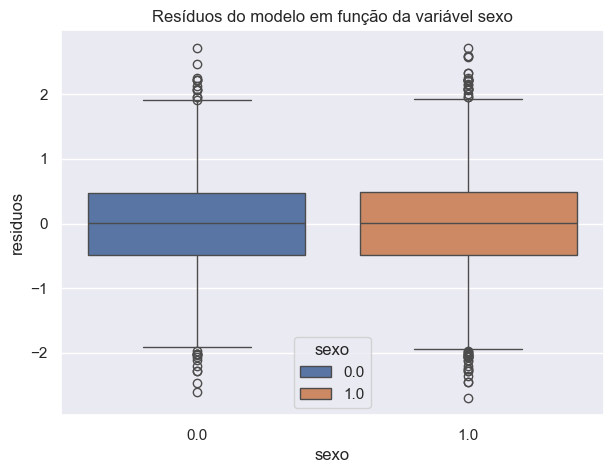

In [116]:
# Resíduos em função da variável sexo

plt.figure(figsize=[7,5])
sns.boxplot(x = df['sexo'],
            y = df_residuos['residuos'],
            hue = df['sexo'])
plt.title('Resíduos do modelo em função da variável sexo')

In [117]:
# Resíduos em função da variável tipo_renda

plt.figure(figsize=[13, 6])
plt.subplot(1,2,1)
sns.boxplot(x = df['tipo_renda_Empresário'], 
            y = df_residuos['residuos'], 
            hue = df['tipo_renda_Empresário'])
plt.title('Resíduos do modelo em função da variável tipo_renda_Empresário')

plt.subplot(1,2,2)
sns.boxplot(x = df_raw['tipo_renda'], 
            y = df_residuos['residuos'],
            hue = df_raw['tipo_renda'])
plt.xticks(rotation=45)
plt.title('Resíduos do modelo em função da variável tipo_renda (geral)')

Text(0.5, 1.0, 'Resíduos do modelo em função da variável tipo_renda (geral)')

In [118]:
# Resíduos em função da variável idade

sns.set_theme(style='darkgrid')

plt.figure(figsize=[14,10])
plt.subplot(2,1,1)
sns.scatterplot(x = df['idade'],
                y = df_residuos['residuos'],
                color = 'purple',
                alpha = .75
               )
plt.axhline(y=0, ls='--', lw=1.5, color='black')
plt.title('Resíduos do modelo em função da variável idade')

plt.subplot(2,1,2)
sns.boxplot(x = df['idade'],
            y = df_residuos['residuos'])
plt.axhline(y=0, ls='--', lw=1.5, color='black')
plt.xticks(rotation=45)
plt.show()

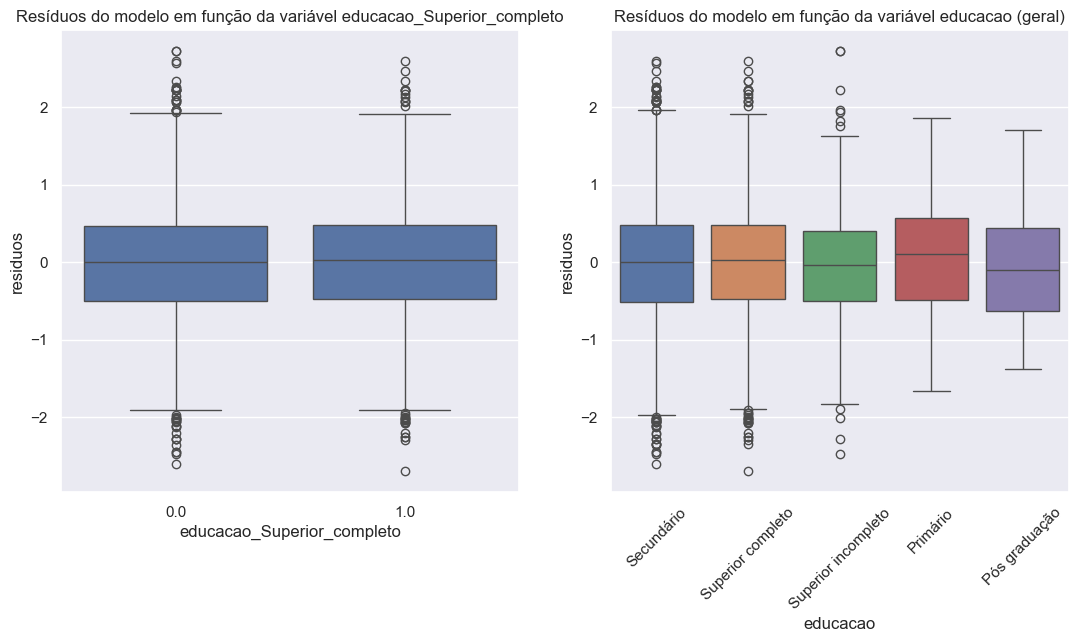

In [119]:
# Resíduos em função da educacao_Superior_completo

fig, axes = plt.subplots(1, 2, figsize=[13,6])
ax1 = sns.boxplot(ax = axes[0],
            x = df['educacao_Superior_completo'], 
            y = df_residuos['residuos'])
ax1.set_title('Resíduos do modelo em função da variável educacao_Superior_completo')

ax2 = sns.boxplot(ax = axes[1],
            x = df_raw['educacao'],
            y = df_residuos['residuos'],
            hue = df_raw['educacao'])
ax2.set_title('Resíduos do modelo em função da variável educacao (geral)')
plt.xticks(rotation=45)
plt.show()

In [120]:
# Resíduos em função da variável estado_civil_Casado

plt.figure(figsize=[13,6])
plt.subplot(1,2,1)
sns.boxplot(x = df['estado_civil_Casado'],
              y = df_residuos['residuos'])
plt.title('Resíduos do modelo em função da variável estado_civil_Casado')

plt.subplot(1,2,2)
sns.boxplot(x = df_raw['estado_civil'],
            y = df_residuos['residuos'],
            hue = df_raw['estado_civil'])
plt.title('Resíduos do modelo em função da variável estado_civil (geral)')


Text(0.5, 1.0, 'Resíduos do modelo em função da variável estado_civil (geral)')

Text(0.5, 1.0, 'Resíduos do modelo em relação a posse_de_imovel')

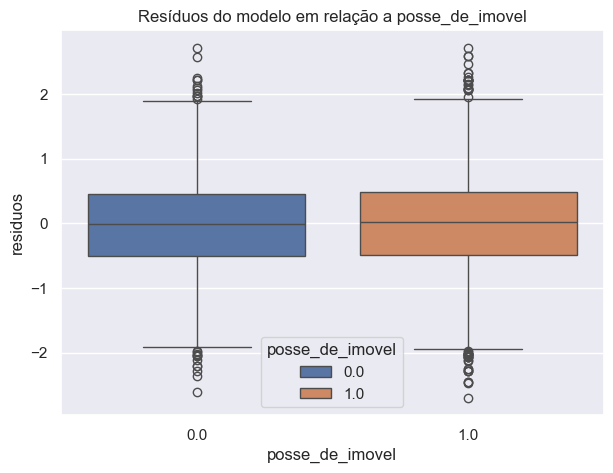

In [121]:
# Resíduos em função da variável posse_imovel

plt.figure(figsize=[7,5])
sns.boxplot(x = df['posse_de_imovel'],
            y = df_residuos['residuos'],
            hue = df['posse_de_imovel'])
plt.title('Resíduos do modelo em relação a posse_de_imovel')

##### Avaliando os valores previstos.

Text(0, 0.5, 'Valores')

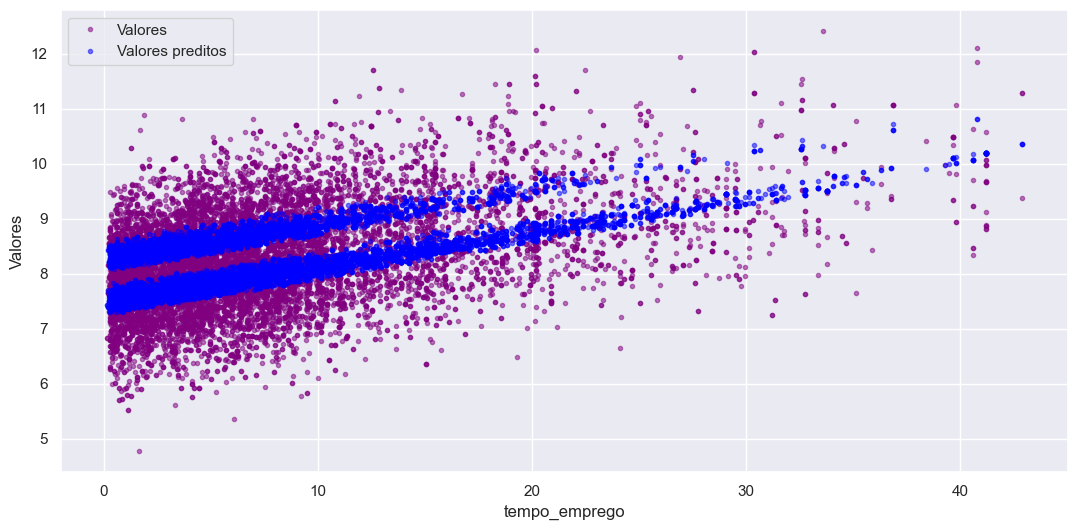

In [123]:
# Distribuição dos valores previstos...

plt.figure(figsize=[13,6])
plt.plot(df['tempo_emprego'], np.log(df['renda']), '.', color='purple', alpha=.5, label='Valores')
plt.plot(df['tempo_emprego'], model.fittedvalues, '.', color='blue', alpha=.5, label='Valores preditos')
plt.legend()
plt.xlabel('tempo_emprego')
plt.ylabel('Valores')

> A distribuição dos valores preditos possui uma boa tendência em relação aos dados originais.

##### Ajustando uma árvore de regressão 

<span style='color:purple'>
Intuíto de encontrar uma modelagem capaz de nos retornar métricas mais satisfatórias para o modelo.

In [126]:
# Separando a base de dados em treino e teste

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.75, test_size=.25, random_state=100)

In [127]:
# Avaliando as dimensões dos grupos treino e teste

print('--> Dados de x para treino: {}'.format(x_train.shape))
print('--> Dados de x para teste: {}'.format(x_test.shape))
print('--> Dados de y para treino: {}'.format(y_train.shape))
print('--> Dados de y para teste: {}'.format(y_test.shape))

--> Dados de x para treino: (9320, 28)
--> Dados de x para teste: (3107, 28)
--> Dados de y para treino: (9320, 1)
--> Dados de y para teste: (3107, 1)


##### Pre-prunning method

Gerando múltiplos modelos e uma representação gráfica dos mesmos para avaliar seu desempenho.

In [129]:
R_quadrado = []
depth_i = []
leaf_j = []
trees = []
mses = []

for i in range(1, 20):
    for j in range(1, 30):
        regressor = DecisionTreeRegressor(max_depth = i, min_samples_leaf = j)
        regressor.fit(x_train, y_train)
        rsquared = regressor.score(x_test, y_test)
        mse = mean_squared_error(y_test, regressor.predict(x_test))
        R_quadrado.append(rsquared)
        depth_i.append(i)
        leaf_j.append(j)
        trees.append(regressor)
        mses.append(mse)
        

# Gerando o dataframe
df_pre_pruning = pd.DataFrame({'R-quadrado': R_quadrado, 'Profundidade': depth_i, 'n_min_leaf': leaf_j, 'trees': trees, 'mse': mses})
print(df_pre_pruning.shape)
df_pre_pruning.head()

(551, 5)


R-quadrado  Profundidade  n_min_leaf  \
0    0.103276             1           1   
1    0.103276             1           2   
2    0.103276             1           3   
3    0.103276             1           4   
4    0.103276             1           5   

                                               trees           mse  
0                 DecisionTreeRegressor(max_depth=1)  5.605671e+07  
1  DecisionTreeRegressor(max_depth=1, min_samples...  5.605671e+07  
2  DecisionTreeRegressor(max_depth=1, min_samples...  5.605671e+07  
3  DecisionTreeRegressor(max_depth=1, min_samples...  5.605671e+07  
4  DecisionTreeRegressor(max_depth=1, min_samples...  5.605671e+07

<Axes: xlabel='n_min_leaf', ylabel='Profundidade'>

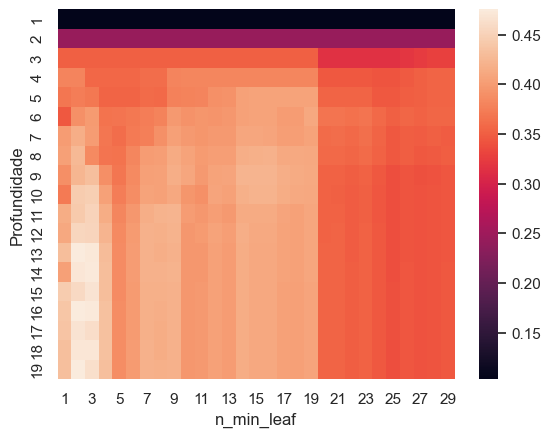

In [130]:
# Figura 

# Pivot table
tabela = df_pre_pruning.pivot_table(index='Profundidade', columns='n_min_leaf', values='R-quadrado')
tabela
# Gerando um heatmap
sns.heatmap(tabela)

In [131]:
# Avaliando a qualidade 

# Valor máximo de R-quadrado
max_value = tabela.values.max()

# Obtendo o valor da profundidade
depth = tabela[tabela.values == max_value]
print('--> Melhor profundidade:', depth.index[0])
print('--> Com um R-quadrado igual a: {}%.'.format(round(max_value*100, 2)))

# Identificando a profundidade
profundidade = df_pre_pruning[df_pre_pruning.Profundidade == depth.index[0]]

# Extraindo o index da melhor árvore a partir do R-quadrado
indice = profundidade[profundidade['R-quadrado'] == profundidade['R-quadrado'].max()].index[0]
# Selecionando a árvore com base na lista "trees"
arvore = trees[indice]
print('--> Árvore - ', arvore)

# Obtendo o MSE da árvore
mse = mean_squared_error(y_test, arvore.predict(x_test))
print('--> O MSE da árvore é: {:.2f}'.format(mse))

--> Melhor profundidade: 13
--> Com um R-quadrado igual a: 47.53%.
--> Árvore -  DecisionTreeRegressor(max_depth=13, min_samples_leaf=2)
--> O MSE da árvore é: 32802064.38


> **Uma vez que os valores `value` dizem respeito ao R-quadrado, podemos afirmar que a árvore cuja profundidade é apresentada pela célula acima representa o modelo de melhor desempenho.**

Text(0.5, 1.0, 'Árvore obtida a partir do "pre-pruning"')

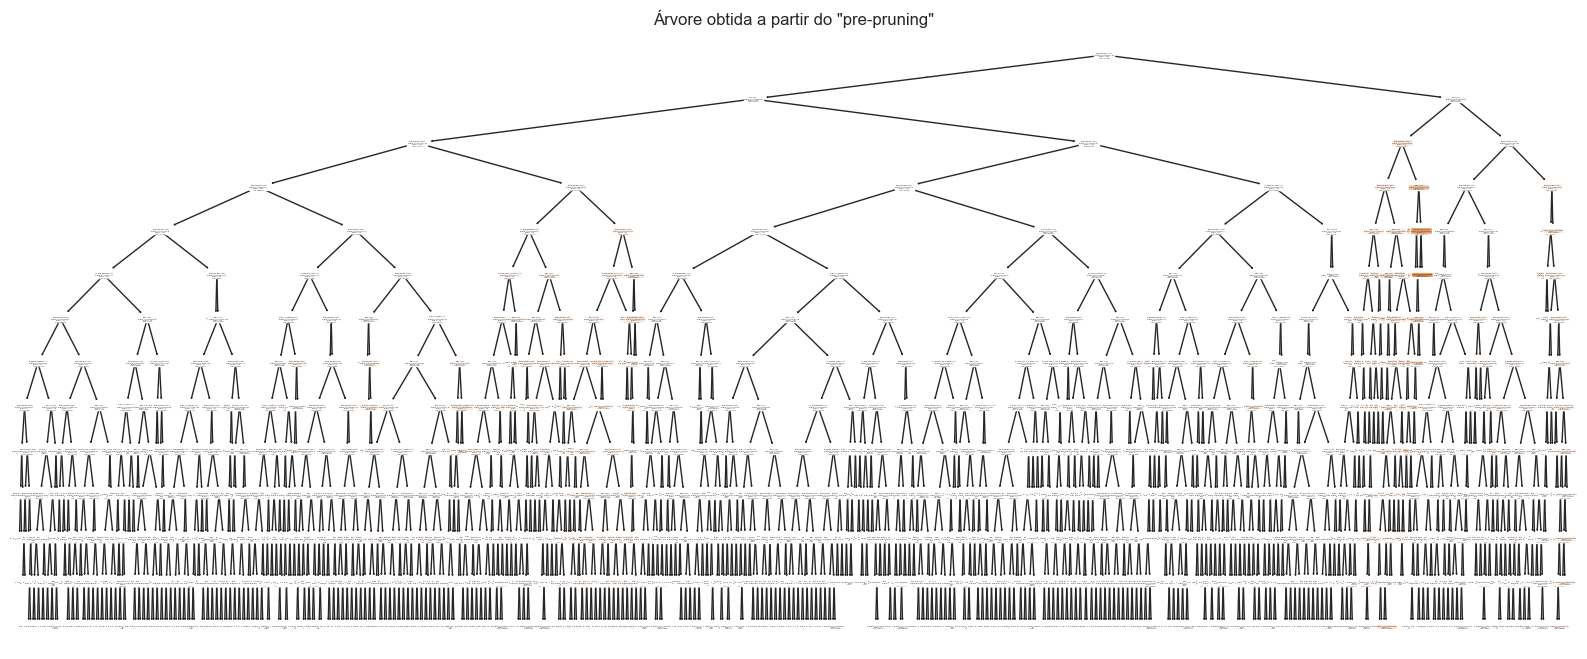

In [133]:
# Visualização gráfica da árvore

plt.figure(figsize=[20,8])
tree.plot_tree(
    arvore, 
    filled=True, 
    feature_names=x.columns
)
plt.title('Árvore obtida a partir do "pre-pruning"')

##### Avaliando por meio da pós-poda (post-pruning)

In [135]:
# Definindo árvores

reg_1 = DecisionTreeRegressor(max_depth=2)
reg_2 = DecisionTreeRegressor(max_depth=8)
reg_3 = DecisionTreeRegressor(max_depth=10)

reg_1.fit(x_train, y_train)
reg_2.fit(x_train, y_train)
reg_3.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [136]:
# Avaliando a qualidade da árvore a partir do score 
# R-quadrado (coeficiente de determinação)

reg_models = {'regressão_1': reg_1, 'regressão_2': reg_2, 'regressão_3': reg_3}

string = '--> O R-quadrado obtido a partir da árvore de profundidade {} ({}) é: {:.3f}%.'

for key, value in reg_models.items():
    print(string.format(value.max_depth, key, value.score(x_test, y_test) * 100))

--> O R-quadrado obtido a partir da árvore de profundidade 2 (regressão_1) é: 24.289%.
--> O R-quadrado obtido a partir da árvore de profundidade 8 (regressão_2) é: 41.882%.
--> O R-quadrado obtido a partir da árvore de profundidade 10 (regressão_3) é: 36.920%.


> Realmente foi possível obter um melhor valor de R-quadrado por meio da utilização de árvores de decisão.

##### Visualização gráfica da árvore de regressão

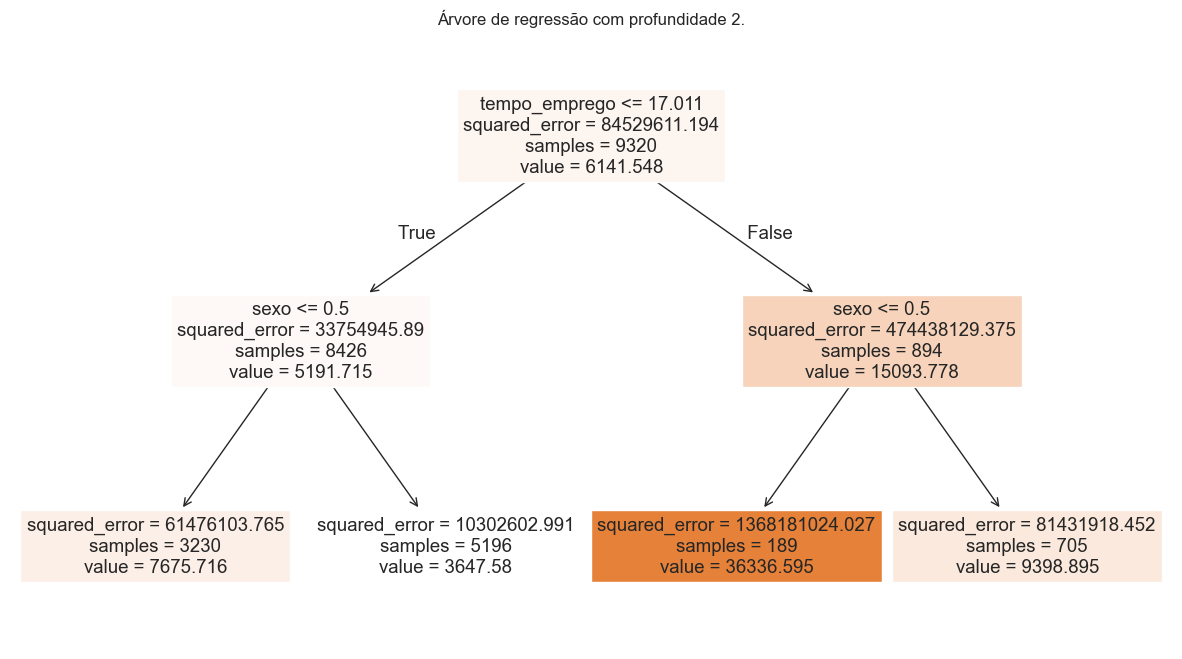

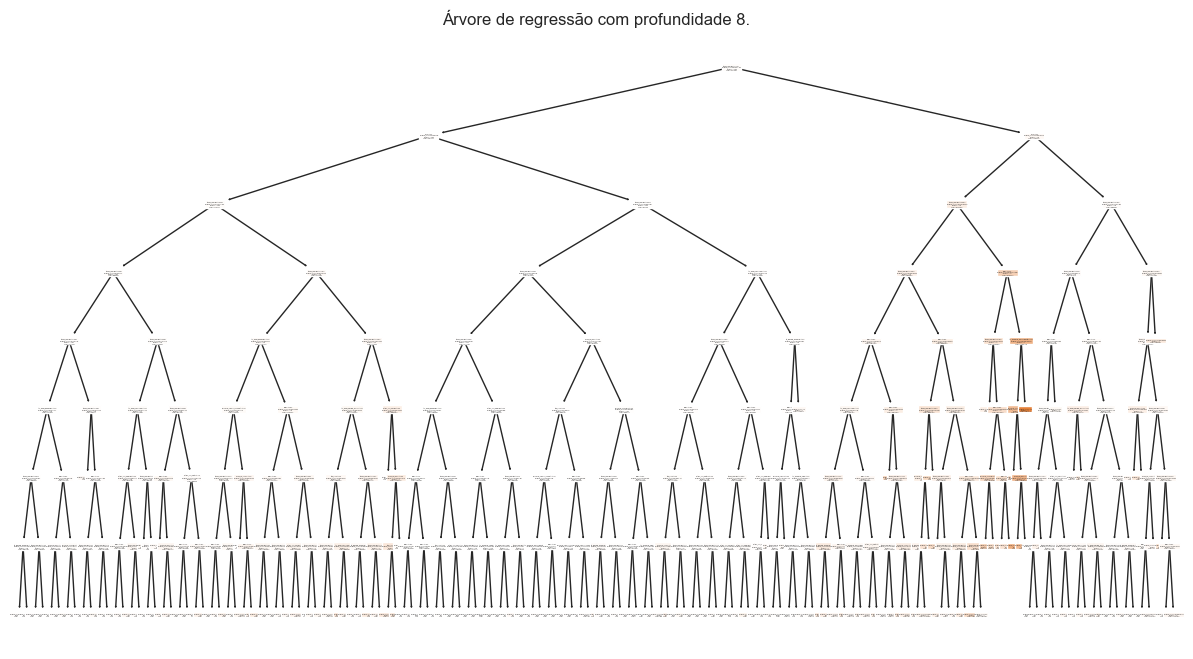

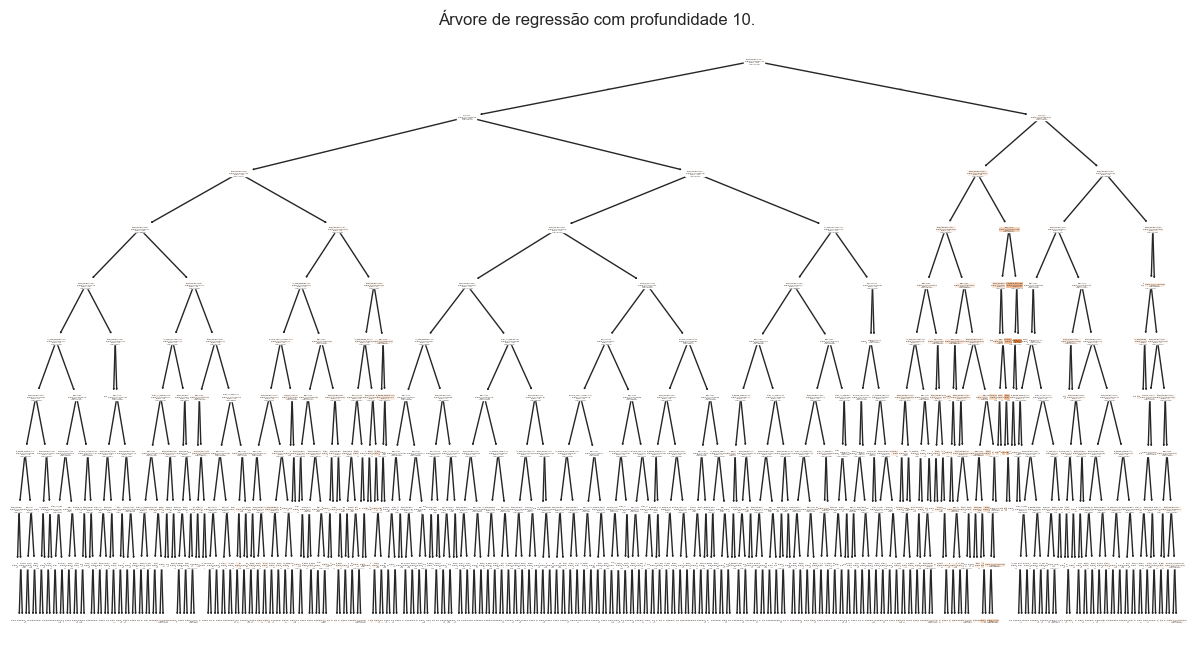

In [139]:
trees = [reg_1, reg_2, reg_3]

for _ in trees:
    plt.figure(figsize=[15,8])
    tree.plot_tree(
        _,
        feature_names=x.columns,
        filled=True
    )
    plt.title('Árvore de regressão com profundidade {}.'.format(_.max_depth))
    plt.show()

##### Façamos um estudo aprimorado da árvore de profundidade 8 (Post-pruning)

- Essa profundidade foi escolhida por apresentar boas métricas.

In [141]:
# Verificando o caminho indicado pelo ccp_alphas e as impurities 

path = reg_2.cost_complexity_pruning_path(x_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 2.33415497e-02, 8.77238238e+01, 1.70945488e+02,
        2.84226986e+02, 6.89649522e+02, 7.85049164e+02, 1.08724311e+03,
        1.22582009e+03, 2.26371243e+03, 2.30589444e+03, 2.46866692e+03,
        2.75141372e+03, 3.03811531e+03, 3.56968983e+03, 4.04849532e+03,
        4.31298646e+03, 4.53858117e+03, 4.67606063e+03, 4.73298053e+03,
        4.74604724e+03, 4.93807795e+03, 5.02598460e+03, 5.42271368e+03,
        5.62246838e+03, 6.17014153e+03, 6.17785729e+03, 6.64153806e+03,
        6.95295488e+03, 7.47274757e+03, 7.47743053e+03, 7.64824412e+03,
        8.31250524e+03, 8.48260857e+03, 8.56982360e+03, 8.64803177e+03,
        9.08620216e+03, 1.00273164e+04, 1.18009291e+04, 1.20844298e+04,
        1.23288603e+04, 1.27212926e+04, 1.29545208e+04, 1.50607477e+04,
        1.51425951e+04, 1.55505333e+04, 1.59163762e+04, 1.62992083e+04,
        1.64476903e+04, 1.69794419e+04, 1.80559460e+04, 1.80591953e+04,
        1.99099511e+04, 1.99216275e+04, 2.18622446

In [142]:
# Separando ccp_alphas e impurity

ccp_alphas = path.ccp_alphas
impurities = path.impurities

# Visualizando graficamente
sns.set_theme(style='darkgrid')
plt.figure(figsize=[13,7])
plt.plot(ccp_alphas, impurities, lw=2, ls='-', color='blue')
plt.xlabel('ccp_alphas')
plt.ylabel('impurities')
plt.title('Impureza em função do ccp_alpha')

Text(0.5, 1.0, 'Impureza em função do ccp_alpha')

##### Treinando árvores para os ccp_alphas encontrados.

- Objetivo de encontrar o melhor modelo como retorno.

**Gerando novas árvores a partir do ccp_alphas**

In [144]:
# Para a segunda regressão
reg_2_trees = []
for ccp_alpha in ccp_alphas:
    new_tree = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    new_tree.fit(x_train, y_train)
    reg_2_trees.append(new_tree)

In [145]:
# Dimensão da lista de árvores

len(reg_2_trees)

125

Text(0.5, 1.0, 'Profundidade da árvore em função do alpha efetivo')

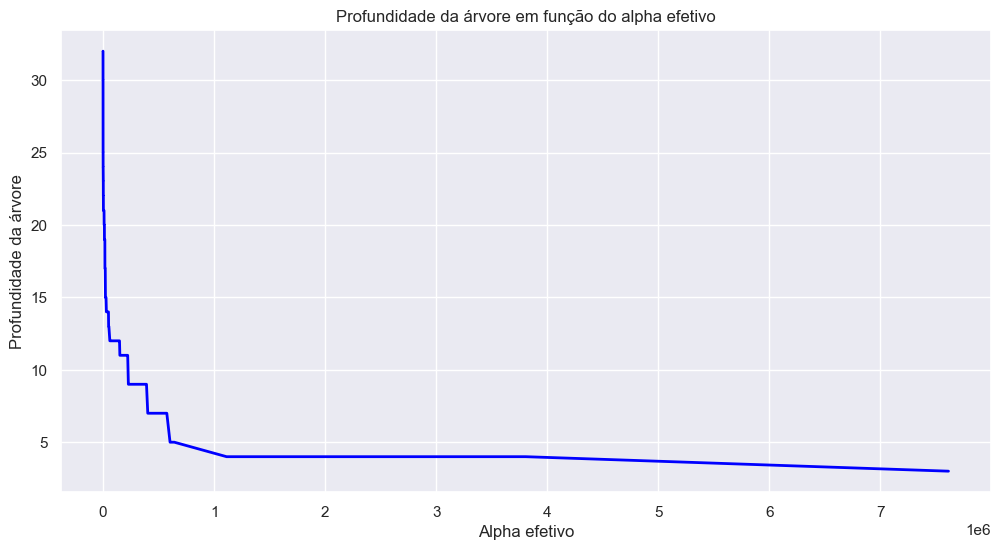

In [146]:
# Profundidade das árvores em função dos alphas

tree_depths = [tree.tree_.max_depth for tree in reg_2_trees]

# Visualizando
plt.figure(figsize=[12,6])
plt.plot(ccp_alphas[:-1], tree_depths[:-1], lw=2, color='blue')
plt.xlabel('Alpha efetivo')
plt.ylabel('Profundidade da árvore')
plt.title('Profundidade da árvore em função do alpha efetivo')

##### Vamos calcular o MSE (mean squared error) para cada uma das árvores das listas

In [148]:
# Para a primeira regressão

# treino
mse_train = []
for _ in reg_2_trees:
    mse_train.append(mean_squared_error(y_train, _.predict(x_train)))

# Teste
mse_test = [mean_squared_error(y_test, _.predict(x_test)) for _ in reg_2_trees]

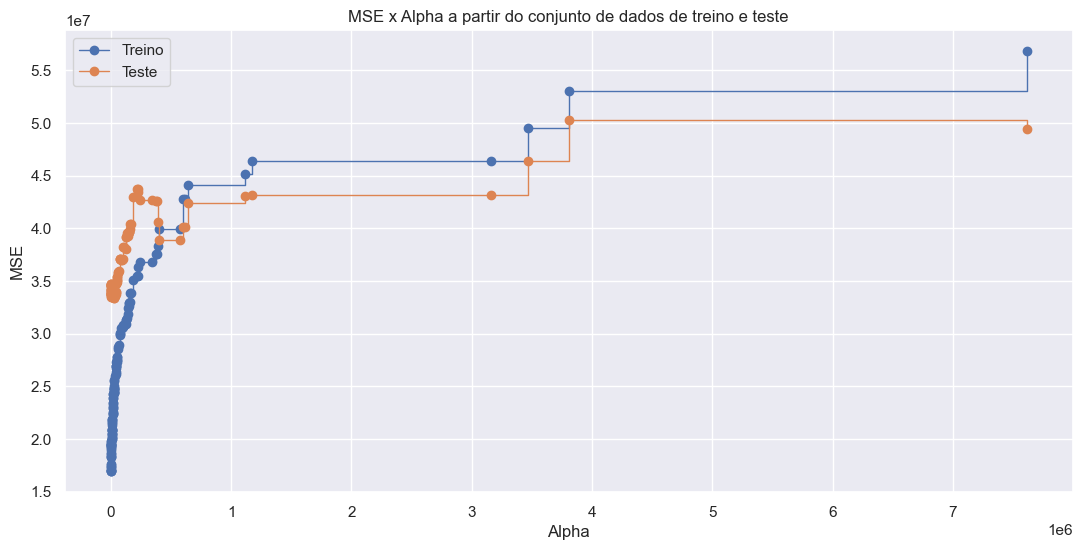

In [149]:
# Visualização gráfica

plt.figure(figsize=[13, 6])
plt.plot(ccp_alphas[:-1], mse_train[:-1], marker='o', ls='-', lw=1, drawstyle='steps-post', label='Treino')
plt.plot(ccp_alphas[:-1], mse_test[:-1], marker='o', ls='-', lw=1, drawstyle='steps-post', label='Teste')
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE x Alpha a partir do conjunto de dados de treino e teste')
plt.show()

##### Definindo o valor de alpha equivalente ao mínimo MSE.

- Vamos definir um novo DataFrame com os dados de interesse para facilitar o processo.

In [151]:
# Considerano apenas os valores de MSE e alpha obtidos 

df_mse_alpha = pd.DataFrame({'mse': mse_test, 'alpha':ccp_alphas})
df_mse_alpha.head(3)

mse      alpha
0  3.469805e+07   0.000000
1  3.469809e+07   0.023342
2  3.467479e+07  87.723824

In [152]:
# Obtendo o valor mínimo
valores = df_mse_alpha[df_mse_alpha['mse'] == df_mse_alpha['mse'].min()]
min_alpha = list(valores['alpha'])[0]
min_mse = list(valores['mse'])[0]
min_alpha, min_mse

(24025.98056936171, 33358827.494216137)

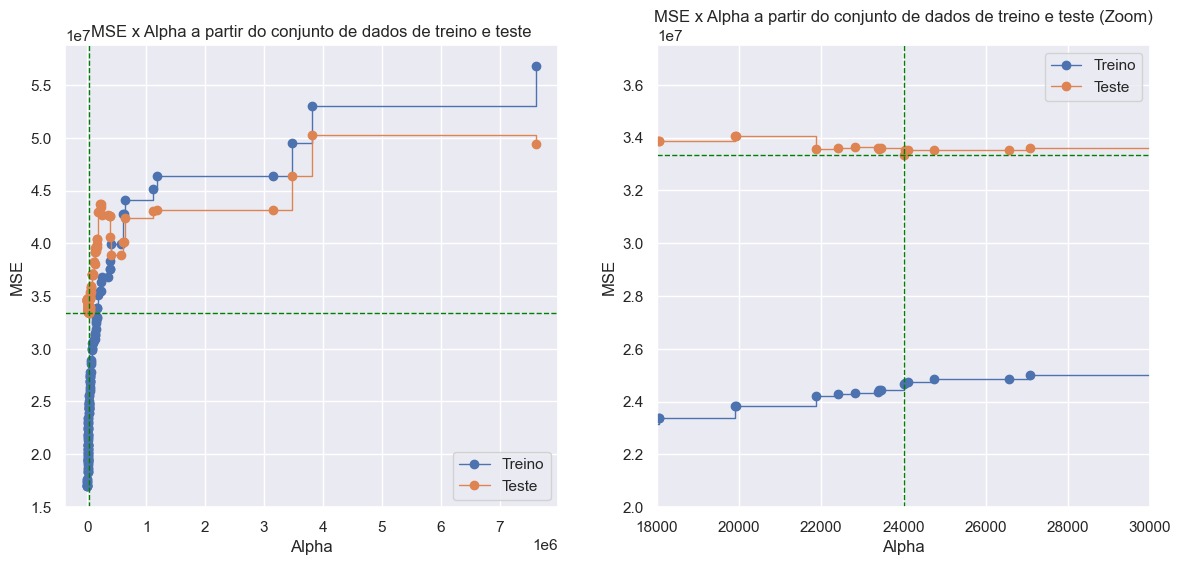

In [153]:
# Visualização gráfica

plt.figure(figsize=[14, 6])

plt.subplot(1,2,1)
plt.plot(ccp_alphas[:-1], mse_train[:-1], marker='o', ls='-', lw=1, drawstyle='steps-post', label='Treino')
plt.plot(ccp_alphas[:-1], mse_test[:-1], marker='o', ls='-', lw=1, drawstyle='steps-post', label='Teste')
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE x Alpha a partir do conjunto de dados de treino e teste')
# Definindo as linhas com base no valor de mínimo mse
plt.axhline(y=min_mse, lw=1, ls='--', color='green')
plt.axvline(x=min_alpha, lw=1, ls='--', color='green')

# Aplicando um "Zoom" para encontrarmos o melhor valor de alpha e mse
plt.subplot(1,2,2)
plt.plot(ccp_alphas[:-1], mse_train[:-1], marker='o', lw=1, drawstyle='steps-post', label='Treino')
plt.plot(ccp_alphas[:-1], mse_test[:-1], marker='o', lw=1, drawstyle='steps-post', label='Teste')
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE x Alpha a partir do conjunto de dados de treino e teste (Zoom)')
plt.xlim(18*10**3, 0.03*10**6) # limite no eixo x
plt.ylim(2*10**7, 3.75*10**7) # limite no eixo y

# Definindo as linhas com base no valor de mínimo mse
plt.axhline(y=min_mse, lw=1, ls='--', color='green')
plt.axvline(x=min_alpha, lw=1, ls='--', color='green')

##### Nova árvore com base no ccp_alpha encontrado

In [155]:
final_tree = DecisionTreeRegressor(random_state=0, ccp_alpha=min_alpha)
final_tree.fit(x_train, y_train)

print('--> Um R-quadrado de {}% foi obtido na base de testes.'.format(round(final_tree.score(x_test, y_test)*100,2)))
print('--> Profundidade da árvore: {}.'.format(final_tree.tree_.max_depth))
print('--> O MSE na base de teste foi: {:.3f}.'.format(mean_squared_error(y_test, final_tree.predict(x_test))))

--> Um R-quadrado de 46.64% foi obtido na base de testes.
--> Profundidade da árvore: 15.
--> O MSE na base de teste foi: 33358827.494.


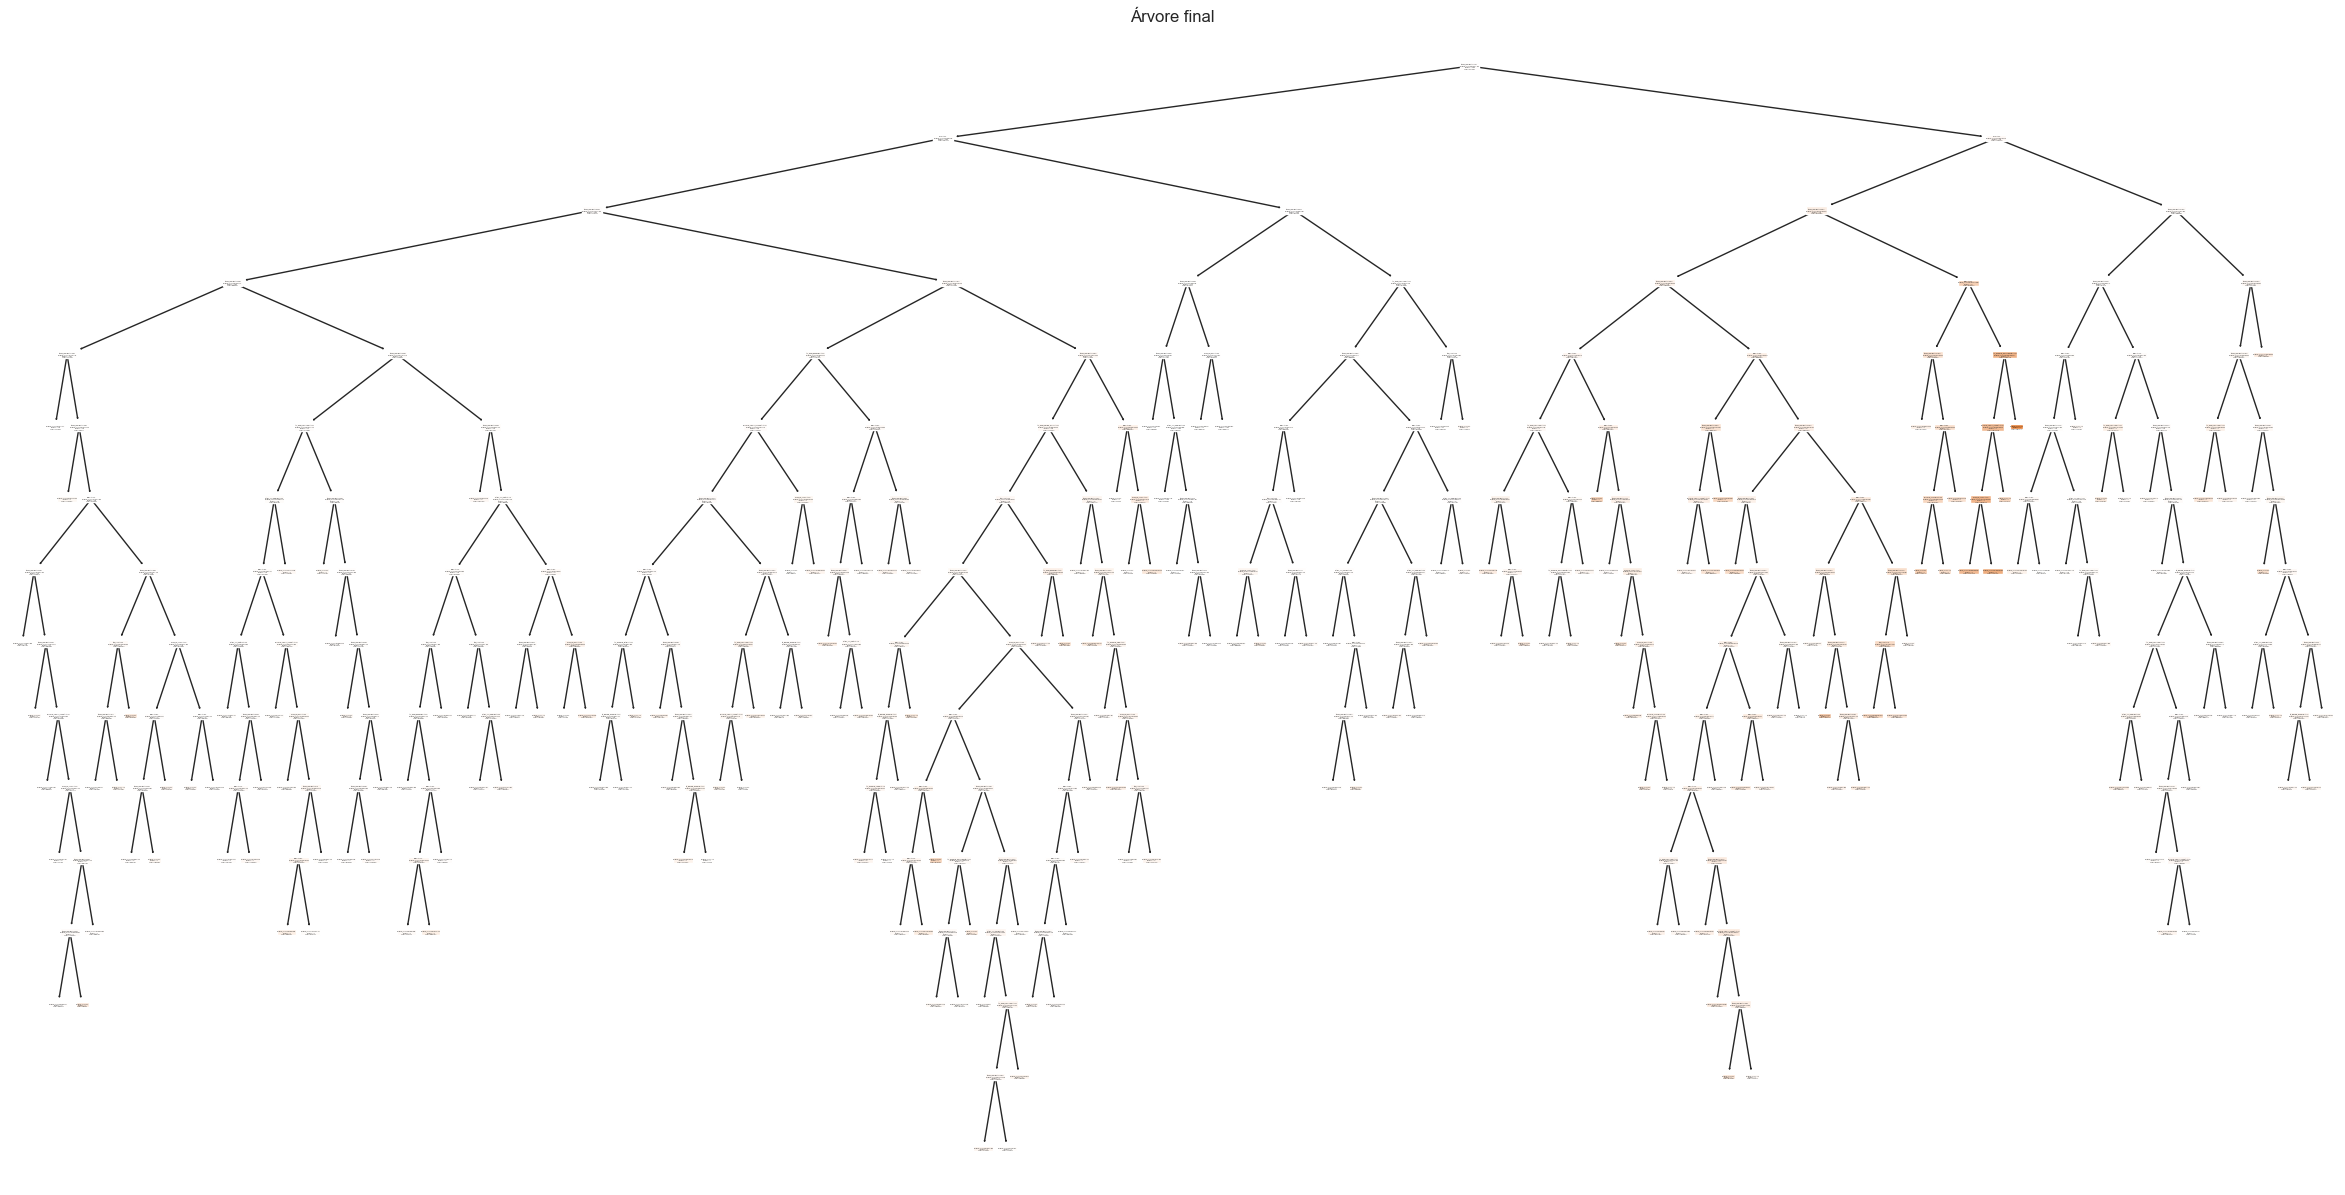

In [156]:
plt.figure(figsize=[30, 15])
tree.plot_tree(
    final_tree,
    feature_names = x.columns,
    filled = True
)
plt.title('Árvore final')
plt.savefig('./output/final_tree.png', dpi=500)

## Etapa 5 Crisp-DM: Avaliação dos resultados <a name='Etapa5'></a>

<div style='text-align: right'

[Voltar ao sumário](#contents)

#### Insights
- A metodologia baseada na pré-poda (pre-pruning) gerou um modelo mais eficiente, com um coeficiente de determinação, R-quadrado ($R^{2}$), igual a <span style='color:blue'> [olhar cécular abaixo] </span>.
- A pós-poda (post-pruning) foi desenvolvida partindo da análise de três regressões (`reg_1`, `reg_2` e `reg_3`). Como a regressão `reg_2` apresentou bons resultados o post-pruning se deu a partir dela e, com essa metodologia, obtivemos um R-quadrado de <span style='color:blue'> [olhar cécular abaixo] </span>. Destacando assim uma melhor eficiência da metodologia de pré-poda.
-  É válido destacar que no que tange ao desenvolvimento de modelos sem enviesamento determinados cuidados devem ser tomados ao trabalhar com dados. Neste estudo avaliamos um conjunto de dados de uma instituição fictícia, mas em um caso real devemos estar atentos para não gerar modelos enviesados por determinadas variáveis. No estudo desenvolvido a variável `sexo` tem esse potêncial.

In [159]:
print('--> R-quadrado do modelo pré-poda: {}%'.format(round(arvore.score(x_test, y_test)*100,2)))
print('--> R-quadrado do modelo de pós-poda: {}%'.format(round(final_tree.score(x_test, y_test)*100,2)))

--> R-quadrado do modelo pré-poda: 47.53%
--> R-quadrado do modelo de pós-poda: 46.64%


## Etapa 6 Crisp-DM: Implantação <a name='Etapa6'> </a>

<div style='text-align: right'

[Voltar ao sumário](#contents)

Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

- A implantação foi desenvolvida por meio do `streamlit`.

- <span style='color:purple'> O script desenvolvido nesse processo está apresentado abaixo.

In [163]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import streamlit as st
# import plotly.express as px


# sns.set(context='talk', style='ticks')

# st.set_page_config(
#      page_title="Análise: Previsão de Renda",
#      page_icon="https://empreenderdinheiro.com.br/wp-content/uploads/2019/07/economia.jpeg",
#      layout="wide",
# )

# st.write('# Análise exploratória: Previsão de renda')
 
# # Carregando banco de dados
# renda_raw = pd.read_csv('./input/previsao_de_renda.csv')
# # Tratamento básico dos dados
# renda1 = renda_raw.drop(['Unnamed: 0', 'id_cliente'], axis=1)
# renda = renda1.dropna()

# # Adicionando filtro para determinado período
# renda.data_ref = pd.to_datetime(renda.data_ref) # Coluna para o formato de datas
# # Definindo os máximos e mínimos 
# min_data = renda.data_ref.min()
# max_data = renda.data_ref.max()

# # Ordenando
# datas = pd.DataFrame(renda.data_ref.unique(), columns=['data_ref'])
# datas.sort_values(by='data_ref', inplace=True, ignore_index=True)
# # st.write(datas)
# # Definindo uma barra lateral com o período de interesse
# st.sidebar.markdown("# <h1 style='text-align: center; color: purple;'>Selecione o período de interesse</h1>", 
#                     unsafe_allow_html=True)

# data_inicial = st.sidebar.date_input('Selecione a data inicial:', 
#                                      value = min_data,
#                                      min_value = min_data, 
#                                      max_value = max_data)
# data_final = st.sidebar.date_input('Selecione a data final:',
#                                     value = max_data, 
#                                     min_value = min_data,
#                                     max_value = max_data)
# st.sidebar.markdown('-------------')
# # Seleção de datas
# st.sidebar.write('Intervalo de datas disponível:')
# st.sidebar.write('Inicial -', min_data)
# st.sidebar.write('Final -', max_data)

# # Definindo os limitadores a partir das datas definidas
# df_renda = renda[(renda['data_ref'] <= pd.to_datetime(data_final)) 
#                 & (renda['data_ref'] >= pd.to_datetime(data_inicial))]

# # Gerando colunas
# left_column, right_column = st.columns(2) # Cria o número de colunas especificado

# with left_column:
#      st.markdown('#### Dicionário de dados:')
#      if st.checkbox('Exibir dicionário!'): # Para exibir a tabela de metadados
#           st.markdown('''
#                     | Variável                | Descrição                                           | Tipo         |
#                     | ----------------------- |:---------------------------------------------------:| ------------:|
#                     | data_ref                |  Data de registro das informações                   | string|
#                     | id_cliente              |  Identificador exclusivo do cliente                 | int |
#                     | sexo                    |  F = 'Feminino'; M = 'Masculino'                    | string |
#                     | posse_de_veiculo        |  False = "Não possui"; "True = Possui"              | bool | 
#                     | posse_de_imovel         |  False = "Não possui"; "True = Possui"              | bool |
#                     | qtd_filhos              |  Quantidade de filhos                               | int |
#                     | tipo_renda              |  Tipo de renda (ex: Empresário, Assalariado etc.)   | string |
#                     | educacao                |  Grau de escolaridade (ex: Primário, Secundário etc.)| string |
#                     | estado_civil            |  Estado civil (ex: Solteiro, Casado etc.)           | string |
#                     | tipo_residencia         |  Tipo de residência (ex: Casa, Aluguel etc.)        | string |
#                     | idade                   |  Idade do cliente (em anos)                         | int |
#                     | tempo_emprego           |  Tempo de emprego (em anos)                         | float |
#                     | qt_pessoas_residencia   |  Número de pessoas na residência                    | float |
#                     | renda                   |  Valor da renda mensal                              | float |            
#                     ''')
          
# with right_column: #Utiliza a coluna da esquerda
#     st.markdown('#### Dataframe utilizado:')
#     if st.checkbox('Exibir DataFrame!'): #Exibe o dataframe quando o checkbox é selecionado
#         st.write('- Shape do DataFrame:', df_renda.shape)
#         st.write('- Período selecionado: ', data_inicial,'--', data_final)
#         df_renda  #Exibe o dataframe 


# st.write('## Análise univariada')
# st.write('- ##### Gráficos de contagem das variáveis em relação a seus respectivos componentes:')
# with st.container():
#      col1, col2, col3 = st.columns(3)
#      with col1:
#           # st.subheader('Escolaridade')
#           # plt.figure(figsize=[.5, .5])
#           fig1 = px.pie(df_renda, names='educacao', title='Escolaridade')
#           st.plotly_chart(fig1)
          
#           # st.subheader('Contagem por sexo')
#           fig2 = px.histogram(df_renda, x='sexo', title='Sexo')
#           st.plotly_chart(fig2)

#           fig3 = px.histogram(df_renda, x='qtd_filhos', title='Quantidade de filhos')
#           st.plotly_chart(fig3)
     
#      with col2:
#           # st.subheader('Tipo de renda')
#           fig1 = px.histogram(df_renda, x='tipo_renda', title='Tipo de renda')
#           st.plotly_chart(fig1)

#           # st.subheader('Estado civil')
#           fig2 = px.pie(df_renda, names='estado_civil', title='Estado civil')
#           st.plotly_chart(fig2)

#           fig3 = px.histogram(df_renda, x='qt_pessoas_residencia', title='Quantidade de pessoas na residência')
#           st.plotly_chart(fig3)

#      with col3:
#           # st.subheader('Posse de imóvel')
#           fig1 = px.histogram(df_renda, x='posse_de_imovel', title='Posse de imóvel')
#           st.plotly_chart(fig1)

#           # st.subheader('Posse de veículo')
#           fig2 = px.histogram(df_renda, x='posse_de_veiculo', title='Posse de veiculo')
#           st.plotly_chart(fig2)

#           fig3 = px.pie(df_renda, names='tipo_residencia', title='Tipo de residência')
#           st.plotly_chart(fig3)          

          

# with st.container():
#      col1, col2 = st.columns(2)

#      with col1:
#           # st.subheader('Tempo de emprego')
#           fig = px.histogram(df_renda, x='tempo_emprego', nbins=15, title='Tempo de emprego',
#                              marginal='box', opacity=1)
#           st.plotly_chart(fig)

#      with col2:
#           # st.subheader('Idade')
#           fig = px.histogram(df_renda, x='idade', nbins=25, title='Idade',
#                              marginal='box')
#           st.plotly_chart(fig)
     


# st.write('## Análise bivariada')


# fig = px.histogram(df_renda, x='data_ref', color='tipo_renda', barmode='group',
#                    title='Contagem da variável "tipo_renda" em relação à "data_ref"',
#                #     marginal='box' 
#                    )
# st.plotly_chart(fig)


# fig = px.histogram(df_renda, x='data_ref', color='educacao', barmode='group',
#                    title='Contagem da variável "educacao" em relação à "data_ref"')
# st.plotly_chart(fig)


# var=['sexo', 'posse_de_veiculo', 'posse_de_imovel']
# for _ in var:
#      fig = px.histogram(df_renda, x=df_renda['data_ref'], y=df_renda['renda'], color=_, barmode='group',
#                     histfunc='avg', 
#                     title=f'Renda média em função da "data_ref" com relação a variável "{_}".') 
#      st.plotly_chart(fig)


# # Scatter
# fig = px.scatter(df_renda, x='tempo_emprego', y = 'renda', opacity=.7, 
#                  marginal_x='box', marginal_y='box', trendline='ols', trendline_color_override='#8A2BE2', 
#                  title='Distribuição da renda em relação ao tempo de emprego')
# st.plotly_chart(fig)

# # Renda em função da escolaridade 
# table = pd.pivot_table(data=df_renda, values='renda', index='educacao', aggfunc='mean').reset_index()
# # Gerando a figura
# fig = px.line(table, x='educacao', y='renda', line_shape='linear', 
#               title='Distribuição da renda média em função da escolaridade')
# st.plotly_chart(fig)        


# # Analisando correlação entre as variáveis numéricas
# st.write('#### Analisando a correlação entre as variáveis')
# number = df_renda[['tempo_emprego', 'sexo', 'tipo_renda', 'idade', 'educacao', 'estado_civil', 'posse_de_imovel']]
# number = pd.get_dummies(number)
# # Matriz de correlação 
# if st.checkbox('Matriz de correlação'):
#      st.write(number.corr())
# # Visualização gráfica
# fig = px.imshow(number.corr(), text_auto='.2f',
#                 aspect='auto', width=1300, height=1300,
#                 title='Correlação entre as variáveis de interesse obtidas pelo "stepwise selection"')
# st.plotly_chart(fig)


# # Outro formato de plot

# # plt.figure(figsize=[25,25])
# # fig = sns.heatmap(number.corr(), annot=True, fmt='.2f')
# # st.pyplot(plt)